# Illumina vs SBX WGS Metrics Comparison

This notebook compares WGS metrics between Illumina and SBX runs.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

# Configuration
SAMPLES_PER_RUN = 1  # Easily adjustable: minimum samples to select per run date

# Colors for plotting
ILLUMINA_COLOR = '#FF6B00' 
SBX_COLOR = '#0066CC'

# Create output directory for plots
os.makedirs('plots', exist_ok=True)

# Presentation-optimized plot settings
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 14,
    'figure.titlesize': 20,
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.2
})

## 1. Load Data

In [37]:
# Load the mapping file for sample ID correction
mapping_df = pd.read_csv('input/wgs-metrics/mapping.csv')
id_mapping = dict(zip(mapping_df['wrongId'].str.lower(), mapping_df['correctId'].str.lower()))
print(f"Loaded {len(id_mapping)} ID mappings")
print(mapping_df)

Loaded 12 ID mappings
      wrongId  correctId
0   H00008754  H00008559
1   H00008757  H00008567
2   H00008839  H00008920
3   H00008841  H00008603
4   H00008847  H00008611
5   H00008848  H00008623
6   H00008874  H00008449
7   H00008882  H00008641
8   H00008897  H00008642
9   H00008904  H00008693
10  H00008914  H00008658
11  H00008923  H00008688


In [38]:
# Load SBX data (skip first 2 rows which are median and sum statistics)
sbx_df = pd.read_csv('input/wgs-metrics/sbx/sbx-wgs-metrics.csv', skiprows=[1, 2])
print(f"SBX data shape: {sbx_df.shape}")
sbx_df.head()

SBX data shape: (244, 56)


,SampleID,Date,Cycle,SampleType,percent_duplex,percent_oneplus,GENOME_TERRITORY,MEAN_COVERAGE,SD_COVERAGE,MEDIAN_COVERAGE,...,mean_read_length,ratio_90_to_10percentile,Num_Full_Length_Reads,Num_One_Plus_Reads,READ_LENGTH_N50,TOTAL_READS,mmetrics_median_read_length,PF_ALIGNED_BASES,FLAGSTAT_DUPLICATES,Yield
0,h00013805,18/12/2025,cycle01,Tumor,0.620036,0.379964,2.922674e+09,89.833561,30.889215,90,...,241.0,1.82352,1.490247e+09,9.132378e+08,247.0,2.328110e+09,233.0,5.570970e+11,700929572.0,590.706816
1,h00013805-ref,18/12/2025,cycle01,Normal,0.619210,0.380790,2.922674e+09,38.112279,12.414431,39,...,241.0,1.72413,5.482264e+08,3.371383e+08,247.0,8.562431e+08,232.0,2.046520e+11,171249593.0,217.555825
2,h00013940,18/12/2025,cycle01,Tumor,0.616406,0.383594,2.922674e+09,96.554298,43.553709,95,...,242.0,2.63157,1.513111e+09,9.416199e+08,249.0,2.376390e+09,233.0,5.709450e+11,647895985.0,605.955078
3,h00013940-ref,18/12/2025,cycle01,Normal,0.601688,0.398312,2.922674e+09,30.425170,10.116816,31,...,244.0,1.73913,4.239310e+08,2.806383e+08,253.0,6.811767e+08,236.0,1.653890e+11,133889068.0,175.886589
4,h00013945,18/12/2025,cycle01,Tumor,0.597636,0.402364,2.922674e+09,95.195191,30.726320,98,...,244.0,1.53947,1.499462e+09,1.009525e+09,254.0,2.417628e+09,237.0,5.870050e+11,636603428.0,627.573795


In [39]:
# Load Illumina data (skip first 2 rows which are median and sum statistics)
il_df = pd.read_csv('input/wgs-metrics/il/il-wgs-metrics.csv', skiprows=[1, 2])
print(f"Illumina data shape: {il_df.shape}")
il_df.head()

Illumina data shape: (270, 58)


,SampleID,Date,Cycle,SampleType,percent_duplex,percent_oneplus,GENOME_TERRITORY,MEAN_COVERAGE,SD_COVERAGE,MEDIAN_COVERAGE,...,MEDIAN_INSERT_SIZE,MEDIAN_ABSOLUTE_DEVIATION,Num_Full_Length_Reads,Num_One_Plus_Reads,READ_LENGTH_N50,TOTAL_READS,mmetrics_median_read_length,PF_ALIGNED_BASES,FLAGSTAT_DUPLICATES,Yield
0,h00006975,NaN,NaN,Tumor,NaN,NaN,2.922674e+09,95.408978,23.669955,98.0,...,475.0,67.0,NaN,NaN,151.0,3.147523e+09,151.0,4.601275e+11,NaN,NaN
1,h00006975-ref,NaN,NaN,Normal,NaN,NaN,2.922674e+09,32.625828,10.241604,33.0,...,460.0,66.0,NaN,NaN,151.0,1.031018e+09,151.0,1.495654e+11,3.059830e+08,155.896197
2,h00007557,NaN,NaN,Tumor,NaN,NaN,2.922674e+09,80.814926,28.816593,79.0,...,507.0,76.0,NaN,NaN,151.0,2.548407e+09,151.0,3.733972e+11,7.853692e+08,385.332737
3,h00007557-ref,NaN,NaN,Normal,NaN,NaN,2.922674e+09,36.053498,10.929513,37.0,...,498.0,74.0,NaN,NaN,151.0,1.020339e+09,151.0,1.493050e+11,2.322071e+08,154.285583
4,h00008121,NaN,NaN,Tumor,NaN,NaN,2.922674e+09,106.319961,29.581952,109.0,...,438.0,94.0,NaN,NaN,151.0,3.605302e+09,151.0,5.278278e+11,1.239879e+09,545.959246


## 2. Filter Out Samples with Missing Metrics

Remove samples that ran partially and are missing values for the metrics we want to plot.

In [40]:
# Define required metrics for the analysis
REQUIRED_METRICS = [
    'MEDIAN_COVERAGE', 'MAD_COVERAGE', 'PCT_10X', 'PCT_30X',
    'AT_DROPOUT', 'GC_DROPOUT', 'TOTAL_READS', 'FLAGSTAT_DUPLICATES', 'Yield'
]

def filter_complete_samples(df, name):
    """Filter out samples with missing values in required metrics."""
    original_count = len(df)
    
    # Check for missing values in required metrics
    missing_mask = df[REQUIRED_METRICS].isna().any(axis=1)
    samples_with_missing = df[missing_mask]['SampleID'].tolist()
    
    if samples_with_missing:
        print(f"\n{name}: Removing {len(samples_with_missing)} rows with missing metrics:")
        for sample in samples_with_missing[:10]:  # Show first 10
            missing_cols = df.loc[df['SampleID'] == sample, REQUIRED_METRICS].isna().any()
            missing_names = missing_cols[missing_cols].index.tolist()
            print(f"  - {sample}: missing {missing_names}")
        if len(samples_with_missing) > 10:
            print(f"  ... and {len(samples_with_missing) - 10} more")
    
    df_filtered = df[~missing_mask].copy()
    print(f"\n{name}: {original_count} -> {len(df_filtered)} rows (removed {original_count - len(df_filtered)})")
    
    return df_filtered

# Filter both datasets
sbx_df = filter_complete_samples(sbx_df, "SBX")
il_df = filter_complete_samples(il_df, "Illumina")


SBX: Removing 3 rows with missing metrics:
  - h00009126: missing ['MAD_COVERAGE', 'PCT_10X', 'PCT_30X', 'AT_DROPOUT', 'GC_DROPOUT', 'TOTAL_READS']
  - coredb011569r2-sbx: missing ['FLAGSTAT_DUPLICATES']
  - coredb011569t-sbx: missing ['FLAGSTAT_DUPLICATES']

SBX: 244 -> 241 rows (removed 3)

Illumina: Removing 112 rows with missing metrics:
  - h00006975: missing ['FLAGSTAT_DUPLICATES', 'Yield']
  - h00008668: missing ['AT_DROPOUT', 'GC_DROPOUT', 'TOTAL_READS', 'Yield']
  - h00008686: missing ['AT_DROPOUT', 'GC_DROPOUT', 'TOTAL_READS', 'Yield']
  - h00008687: missing ['AT_DROPOUT', 'GC_DROPOUT', 'TOTAL_READS', 'Yield']
  - h00008690: missing ['AT_DROPOUT', 'GC_DROPOUT', 'TOTAL_READS', 'Yield']
  - h00008704: missing ['AT_DROPOUT', 'GC_DROPOUT', 'TOTAL_READS', 'Yield']
  - h00008704-ref: missing ['AT_DROPOUT', 'GC_DROPOUT', 'TOTAL_READS', 'Yield']
  - h00008709: missing ['AT_DROPOUT', 'GC_DROPOUT', 'TOTAL_READS', 'Yield']
  - h00008709-ref: missing ['AT_DROPOUT', 'GC_DROPOUT', 'TOTAL_

## 3. Correct SBX Sample IDs

In [41]:
def correct_sample_id(sample_id, mapping):
    """Correct sample ID using the mapping, handling both tumor and normal samples."""
    sample_id_lower = sample_id.lower()
    
    # Check if it's a reference/normal sample (ends with -ref)
    is_ref = sample_id_lower.endswith('-ref')
    base_id = sample_id_lower.replace('-ref', '') if is_ref else sample_id_lower
    
    # Apply mapping if exists
    if base_id in mapping:
        corrected_base = mapping[base_id]
        return corrected_base + '-ref' if is_ref else corrected_base
    
    return sample_id_lower

# Apply correction to SBX data
sbx_df['SampleID_original'] = sbx_df['SampleID']
sbx_df['SampleID'] = sbx_df['SampleID'].apply(lambda x: correct_sample_id(x, id_mapping))

# Show corrected IDs
corrected = sbx_df[sbx_df['SampleID'] != sbx_df['SampleID_original'].str.lower()][['SampleID_original', 'SampleID']]
print(f"Corrected {len(corrected)} sample IDs:")
corrected

Corrected 22 sample IDs:


,SampleID_original,SampleID
80,h00008754,h00008559
81,h00008754-ref,h00008559-ref
82,h00008757,h00008567
83,h00008757-ref,h00008567-ref
88,h00008841,h00008603
89,h00008841-ref,h00008603-ref
90,h00008847,h00008611
91,h00008847-ref,h00008611-ref
92,h00008848,h00008623
93,h00008848-ref,h00008623-ref


## 4. Find Matching Samples

In [42]:
# Normalize Illumina sample IDs to lowercase for matching
il_df['SampleID'] = il_df['SampleID'].str.lower()

# Get unique sample IDs (base IDs without -ref suffix)
def get_base_id(sample_id):
    return sample_id.replace('-ref', '')

sbx_base_ids = set(sbx_df['SampleID'].apply(get_base_id).unique())
il_base_ids = set(il_df['SampleID'].apply(get_base_id).unique())

# Find matching samples (present in both datasets)
matching_base_ids = sbx_base_ids & il_base_ids

print(f"Total SBX samples: {len(sbx_base_ids)}")
print(f"Total Illumina samples: {len(il_base_ids)}")
print(f"Matching samples: {len(matching_base_ids)}")
print(f"SBX samples without Illumina match: {len(sbx_base_ids - il_base_ids)}")

Total SBX samples: 126
Total Illumina samples: 97
Matching samples: 69
SBX samples without Illumina match: 57


In [43]:
# Filter SBX data to only include matching samples and add base_id column
sbx_df['base_id'] = sbx_df['SampleID'].apply(get_base_id)
il_df['base_id'] = il_df['SampleID'].apply(get_base_id)

sbx_matched = sbx_df[sbx_df['base_id'].isin(matching_base_ids)].copy()
il_matched = il_df[il_df['base_id'].isin(matching_base_ids)].copy()

print(f"SBX matched rows: {len(sbx_matched)}")
print(f"Illumina matched rows: {len(il_matched)}")

SBX matched rows: 147
Illumina matched rows: 116


## 5. Distribution of Matching Samples by Run Date

In [44]:
# Parse dates in SBX data
sbx_matched['Date_parsed'] = pd.to_datetime(sbx_matched['Date'], format='%d/%m/%Y')

# Get distribution of matched samples by run date (using tumor samples only to avoid double counting)
sbx_tumor_matched = sbx_matched[sbx_matched['SampleType'] == 'Tumor']
date_distribution = sbx_tumor_matched.groupby('Date').agg(
    num_samples=('base_id', 'nunique'),
    samples=('base_id', lambda x: list(x.unique()))
).reset_index()

print("Distribution of matching samples by run date:")
date_distribution

Distribution of matching samples by run date:


,Date,num_samples,samples
0,03/10/2025,11,"[h00008658, h00008663, h00008688, h00008693, h..."
1,06/10/2025,3,"[h00008549, h00008591, h00008598]"
2,16/10/2025,13,"[h00008559, h00008567, h00008835, h00008849, h..."
3,17/10/2025,2,"[h00008812, h00009057]"
4,19/09/2025,10,"[h00008665, h00008668, h00008672, h00008684, h..."
5,22/08/2025,6,"[h00008539, h00008560, h00008559, h00008567, h..."
6,23/09/2025,6,"[h00008569, h00008582, h00009035, h00008574, h..."
7,26/09/2025,12,"[h00008885, h00008905, h00008920, h00009004, h..."
8,27/11/2025,5,"[h00013802, h00013782, h00013785, h00013794, h..."
9,28/10/2025,5,"[h00008919, h00009005, h00008481, h00008502, h..."


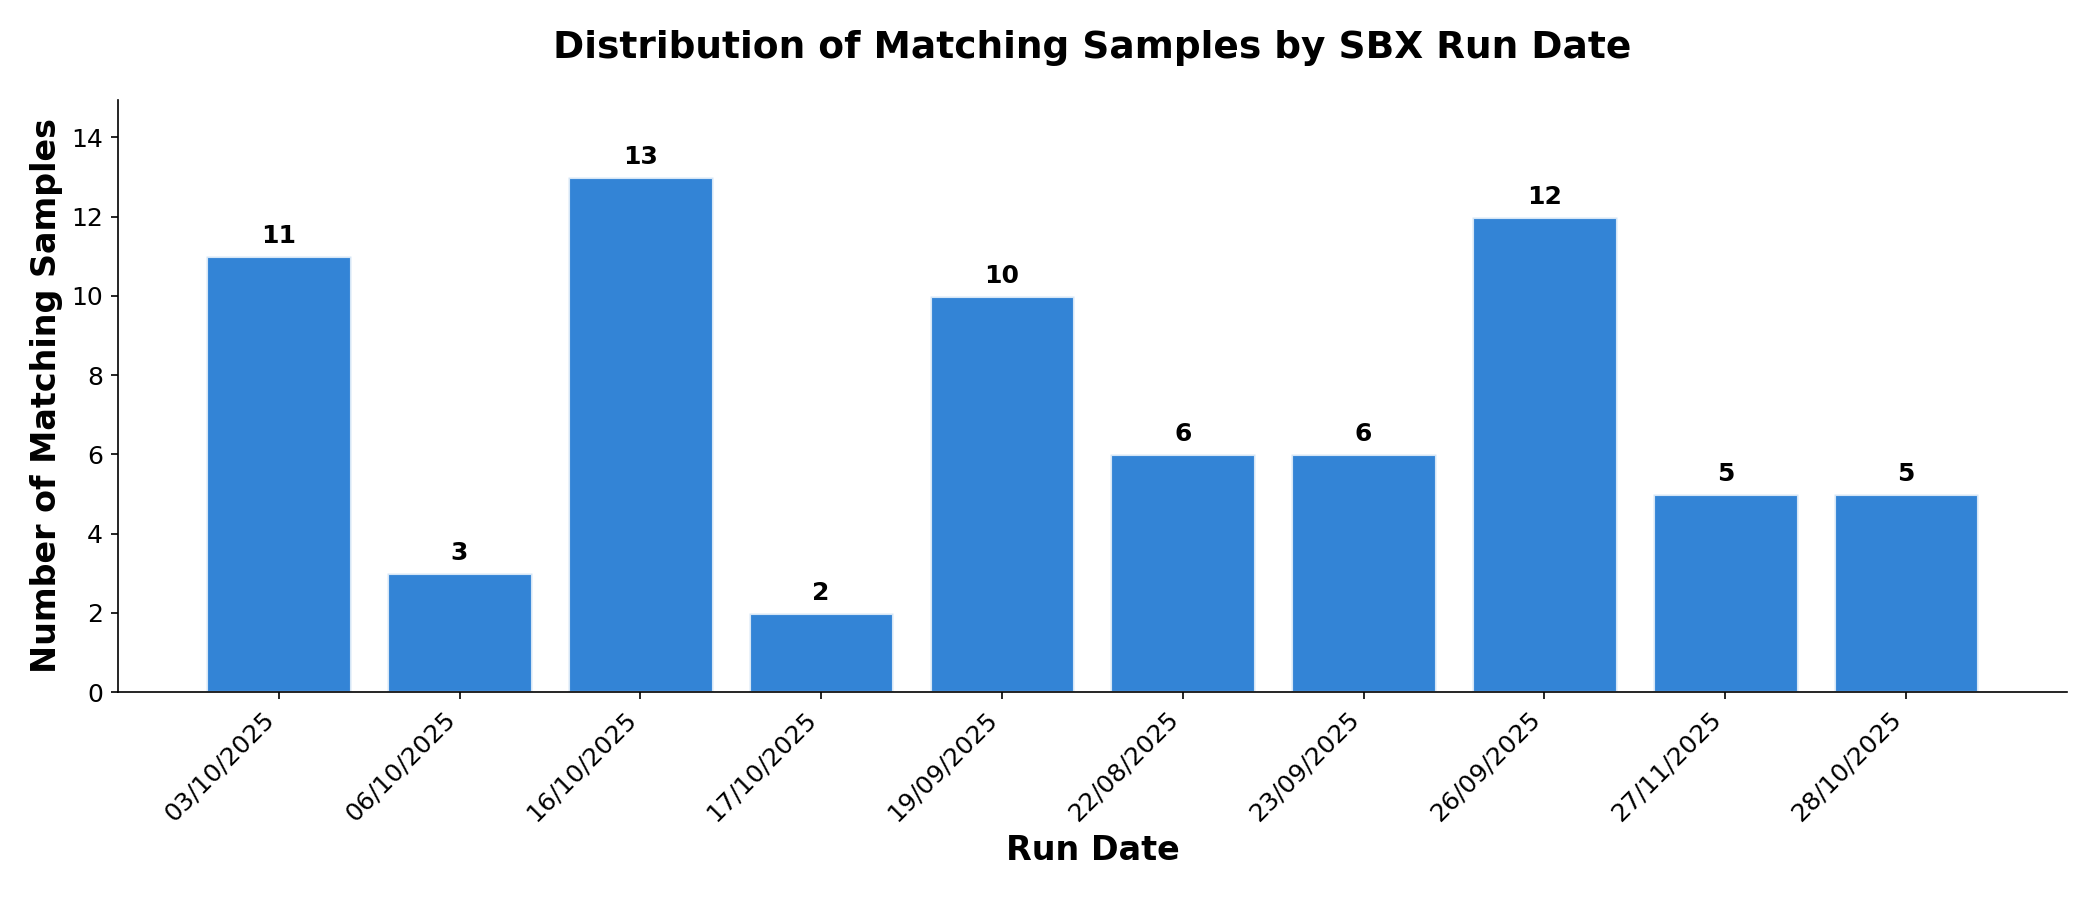


Total unique run dates: 10
Total matching samples: 73


In [45]:
# Visualize the distribution (presentation-optimized)
fig, ax = plt.subplots(figsize=(14, 6))

# Sort by date
date_distribution_sorted = date_distribution.sort_values('Date')

bars = ax.bar(range(len(date_distribution_sorted)), 
              date_distribution_sorted['num_samples'], 
              color=SBX_COLOR, alpha=0.8, edgecolor='white', linewidth=1.5)

ax.set_xlabel('Run Date', fontweight='bold')
ax.set_ylabel('Number of Matching Samples', fontweight='bold')
ax.set_title('Distribution of Matching Samples by SBX Run Date', fontweight='bold', pad=20)
ax.set_xticks(range(len(date_distribution_sorted)))
ax.set_xticklabels(date_distribution_sorted['Date'], rotation=45, ha='right')

# Add count labels on bars
for bar, count in zip(bars, date_distribution_sorted['num_samples']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.2, 
            str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, max(date_distribution_sorted['num_samples']) * 1.15)

plt.tight_layout()
plt.savefig('plots/run_date_distribution.png')
plt.show()

print(f"\nTotal unique run dates: {len(date_distribution)}")
print(f"Total matching samples: {date_distribution['num_samples'].sum()}")

## 6. Select Samples for Comparison

In [56]:
def create_metric_plot(comparison_df, metric_name, title, ylabel, filename, figsize=(14, 6)):
    """
    Create a presentation-optimized bar chart comparing SBX vs Illumina for a given metric.
    Saves the plot as a separate file (no legend - use separate legend plot).
    """
    fig, ax = plt.subplots(figsize=figsize)

    samples = comparison_df['base_id'].values
    sbx_values = comparison_df[f'{metric_name}_sbx'].values
    il_values = comparison_df[f'{metric_name}_il'].values

    x = np.arange(len(samples))
    width = 0.35

    # Create bars with better styling
    ax.bar(x - width/2, il_values, width,
           label='Illumina', color=ILLUMINA_COLOR,
           alpha=0.9, edgecolor='white', linewidth=1.5)
    ax.bar(x + width/2, sbx_values, width,
           label='SBX', color=SBX_COLOR,
           alpha=0.9, edgecolor='white', linewidth=1.5)

    # Styling
    ax.set_ylabel(ylabel, fontweight='bold')
    ax.set_title(title, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(samples, rotation=45, ha='right')
    ax.set_xlabel('Sample ID', fontweight='bold')

    # No legend on individual plots - use separate legend plot

    # Clean up spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Add subtle grid
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)

    # Adjust y-axis to have some headroom
    ymax = max(max(il_values), max(sbx_values))
    ax.set_ylim(0, ymax * 1.1)

    plt.tight_layout()
    plt.savefig(f'plots/{filename}')
    plt.show()

    print(f"Saved: plots/{filename}")
    return fig

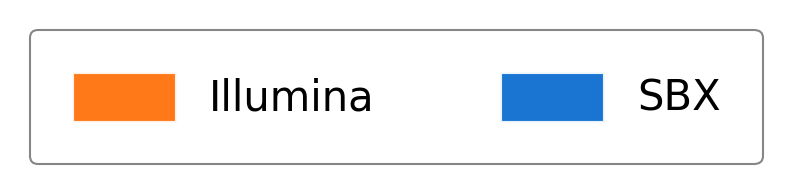

Saved: plots/legend.png


In [57]:
# Create a standalone legend plot for use in presentations
def create_legend_plot():
    """Create a standalone legend plot."""
    fig, ax = plt.subplots(figsize=(4, 1.2))

    # Create dummy bars for legend
    ax.bar([0], [0], label='Illumina', color=ILLUMINA_COLOR, alpha=0.9, edgecolor='white', linewidth=1.5)
    ax.bar([0], [0], label='SBX', color=SBX_COLOR, alpha=0.9, edgecolor='white', linewidth=1.5)

    # Hide the axes
    ax.set_visible(False)

    # Create legend
    legend = fig.legend(
        loc='center',
        ncol=2,
        fontsize=20,
        frameon=True,
        edgecolor='gray',
        framealpha=0.95,
        handlelength=2.5,
        handleheight=1.5,
        borderpad=1,
        columnspacing=3
    )

    plt.savefig('plots/legend.png', transparent=False, facecolor='white', bbox_inches='tight')
    plt.show()
    print("Saved: plots/legend.png")

# Generate the legend
create_legend_plot()

In [58]:
# Filter data to selected samples
sbx_selected = sbx_matched[sbx_matched['base_id'].isin(selected_samples)].copy()
il_selected = il_matched[il_matched['base_id'].isin(selected_samples)].copy()

print(f"SBX selected rows: {len(sbx_selected)}")
print(f"Illumina selected rows: {len(il_selected)}")

SBX selected rows: 24
Illumina selected rows: 18


## 7. Prepare Data for Plotting

In [59]:
# Calculate % duplicate reads
sbx_selected['PCT_DUPLICATE'] = sbx_selected['FLAGSTAT_DUPLICATES'] / sbx_selected['TOTAL_READS'] * 100
il_selected['PCT_DUPLICATE'] = il_selected['FLAGSTAT_DUPLICATES'] / il_selected['TOTAL_READS'] * 100

# Separate tumor and normal samples
sbx_tumor = sbx_selected[sbx_selected['SampleType'] == 'Tumor'].sort_values('base_id')
sbx_normal = sbx_selected[sbx_selected['SampleType'] == 'Normal'].sort_values('base_id')
il_tumor = il_selected[il_selected['SampleType'] == 'Tumor'].sort_values('base_id')
il_normal = il_selected[il_selected['SampleType'] == 'Normal'].sort_values('base_id')

print(f"Tumor samples - SBX: {len(sbx_tumor)}, Illumina: {len(il_tumor)}")
print(f"Normal samples - SBX: {len(sbx_normal)}, Illumina: {len(il_normal)}")

Tumor samples - SBX: 12, Illumina: 9
Normal samples - SBX: 12, Illumina: 9


In [60]:
# Merge data for easier comparison (tumor)
tumor_comparison = pd.merge(
    sbx_tumor[['base_id', 'MEDIAN_COVERAGE', 'MAD_COVERAGE', 'PCT_30X', 'AT_DROPOUT', 'GC_DROPOUT', 'PCT_DUPLICATE', 'Yield']],
    il_tumor[['base_id', 'MEDIAN_COVERAGE', 'MAD_COVERAGE', 'PCT_30X', 'AT_DROPOUT', 'GC_DROPOUT', 'PCT_DUPLICATE', 'Yield']],
    on='base_id',
    suffixes=('_sbx', '_il')
)

# Merge data for easier comparison (normal)
normal_comparison = pd.merge(
    sbx_normal[['base_id', 'MEDIAN_COVERAGE', 'MAD_COVERAGE', 'PCT_10X', 'AT_DROPOUT', 'GC_DROPOUT', 'PCT_DUPLICATE', 'Yield']],
    il_normal[['base_id', 'MEDIAN_COVERAGE', 'MAD_COVERAGE', 'PCT_10X', 'AT_DROPOUT', 'GC_DROPOUT', 'PCT_DUPLICATE', 'Yield']],
    on='base_id',
    suffixes=('_sbx', '_il')
)

print(f"Tumor comparison samples: {len(tumor_comparison)}")
print(f"Normal comparison samples: {len(normal_comparison)}")

Tumor comparison samples: 11
Normal comparison samples: 11


## 8. Plotting Function (Presentation-Optimized)

In [63]:
def create_metric_plot(comparison_df, metric_name, title, ylabel, filename, figsize=(14, 6)):
    """
    Create a presentation-optimized bar chart comparing SBX vs Illumina for a given metric.
    Saves the plot as a separate file.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    samples = comparison_df['base_id'].values
    sbx_values = comparison_df[f'{metric_name}_sbx'].values
    il_values = comparison_df[f'{metric_name}_il'].values
    
    x = np.arange(len(samples))
    width = 0.35
    
    # Create bars with better styling
    bars1 = ax.bar(x - width/2, il_values, width, 
                   label='Illumina', color=ILLUMINA_COLOR, 
                   alpha=0.9, edgecolor='white', linewidth=1.5)
    bars2 = ax.bar(x + width/2, sbx_values, width, 
                   label='SBX', color=SBX_COLOR, 
                   alpha=0.9, edgecolor='white', linewidth=1.5)
    
    # Styling
    ax.set_ylabel(ylabel, fontweight='bold')
    ax.set_title(title, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(samples, rotation=45, ha='right')
    ax.set_xlabel('Sample ID', fontweight='bold')
    
    # Legend
    # ax.legend(loc='upper right', framealpha=0.9, edgecolor='gray')
    
    # Clean up spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Add subtle grid
    ax.yaxis.grid(True, linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)
    
    # Adjust y-axis to have some headroom
    ymax = max(max(il_values), max(sbx_values))
    ax.set_ylim(0, ymax * 1.1)
    
    plt.tight_layout()
    plt.savefig(f'plots/{filename}')
    plt.show()
    
    print(f"Saved: plots/{filename}")
    return fig

## 9. Tumor Sample Metrics - Individual Plots

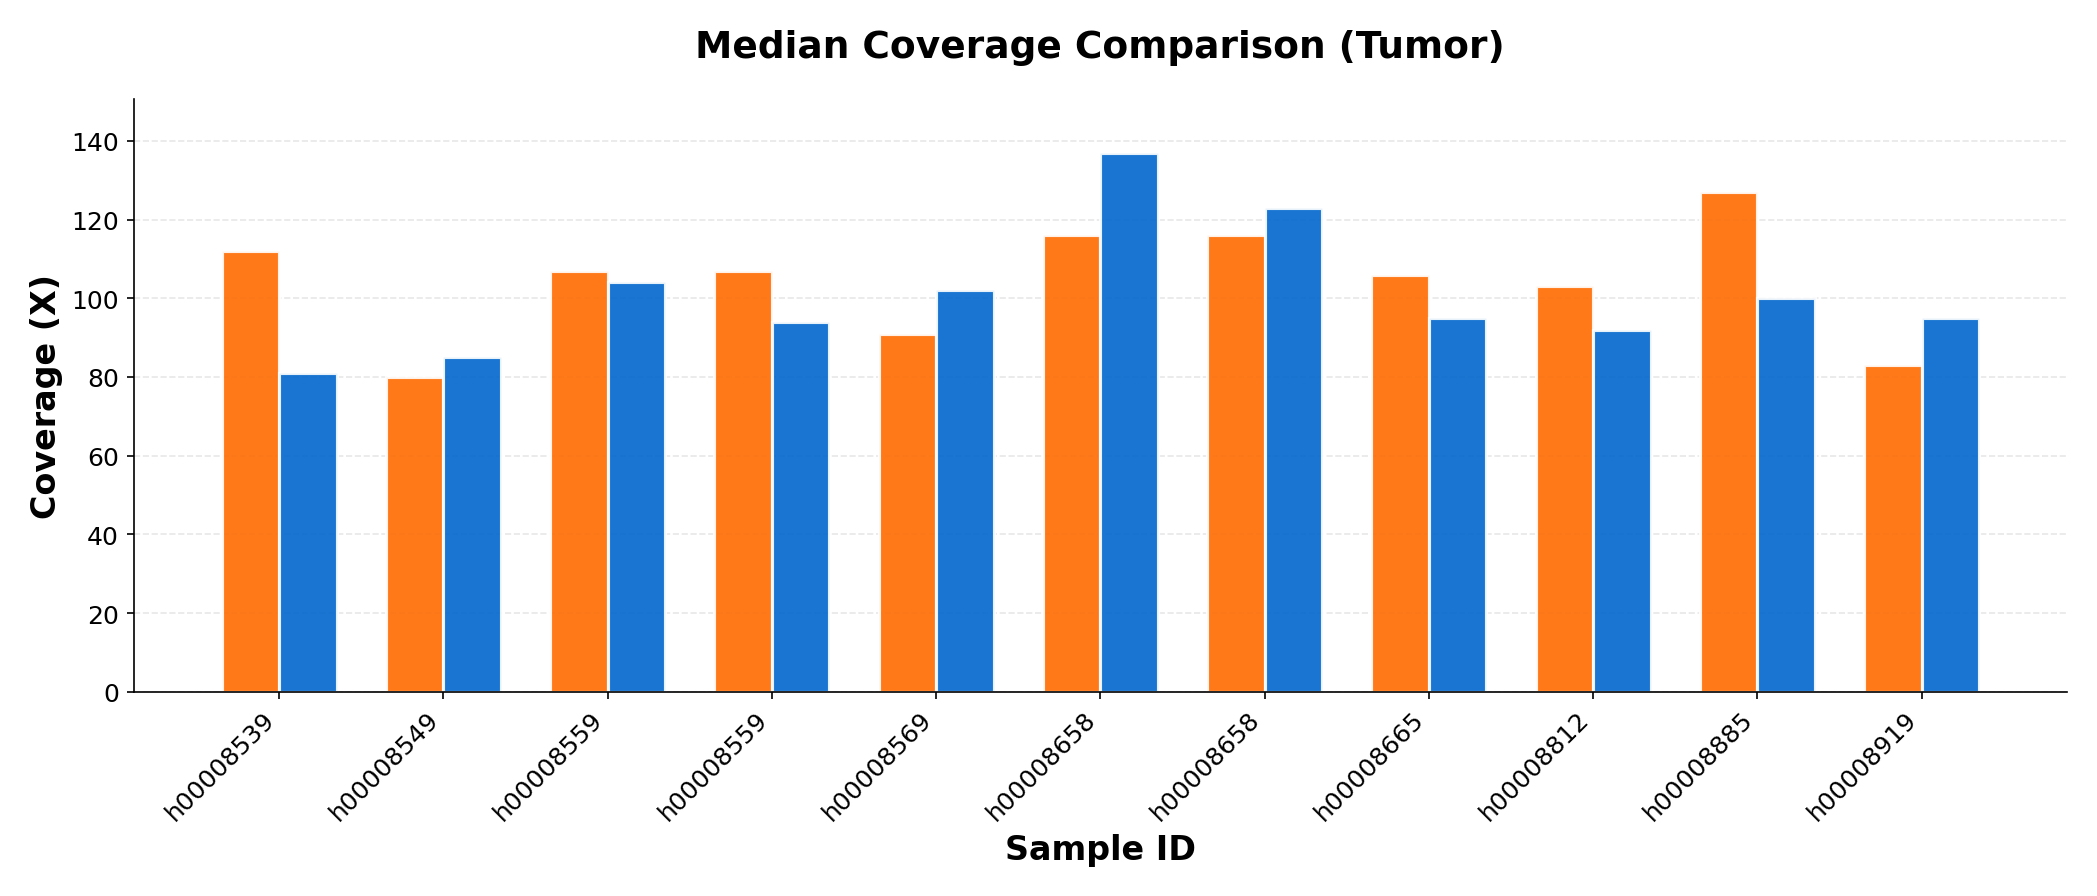

Saved: plots/tumor_median_coverage.png


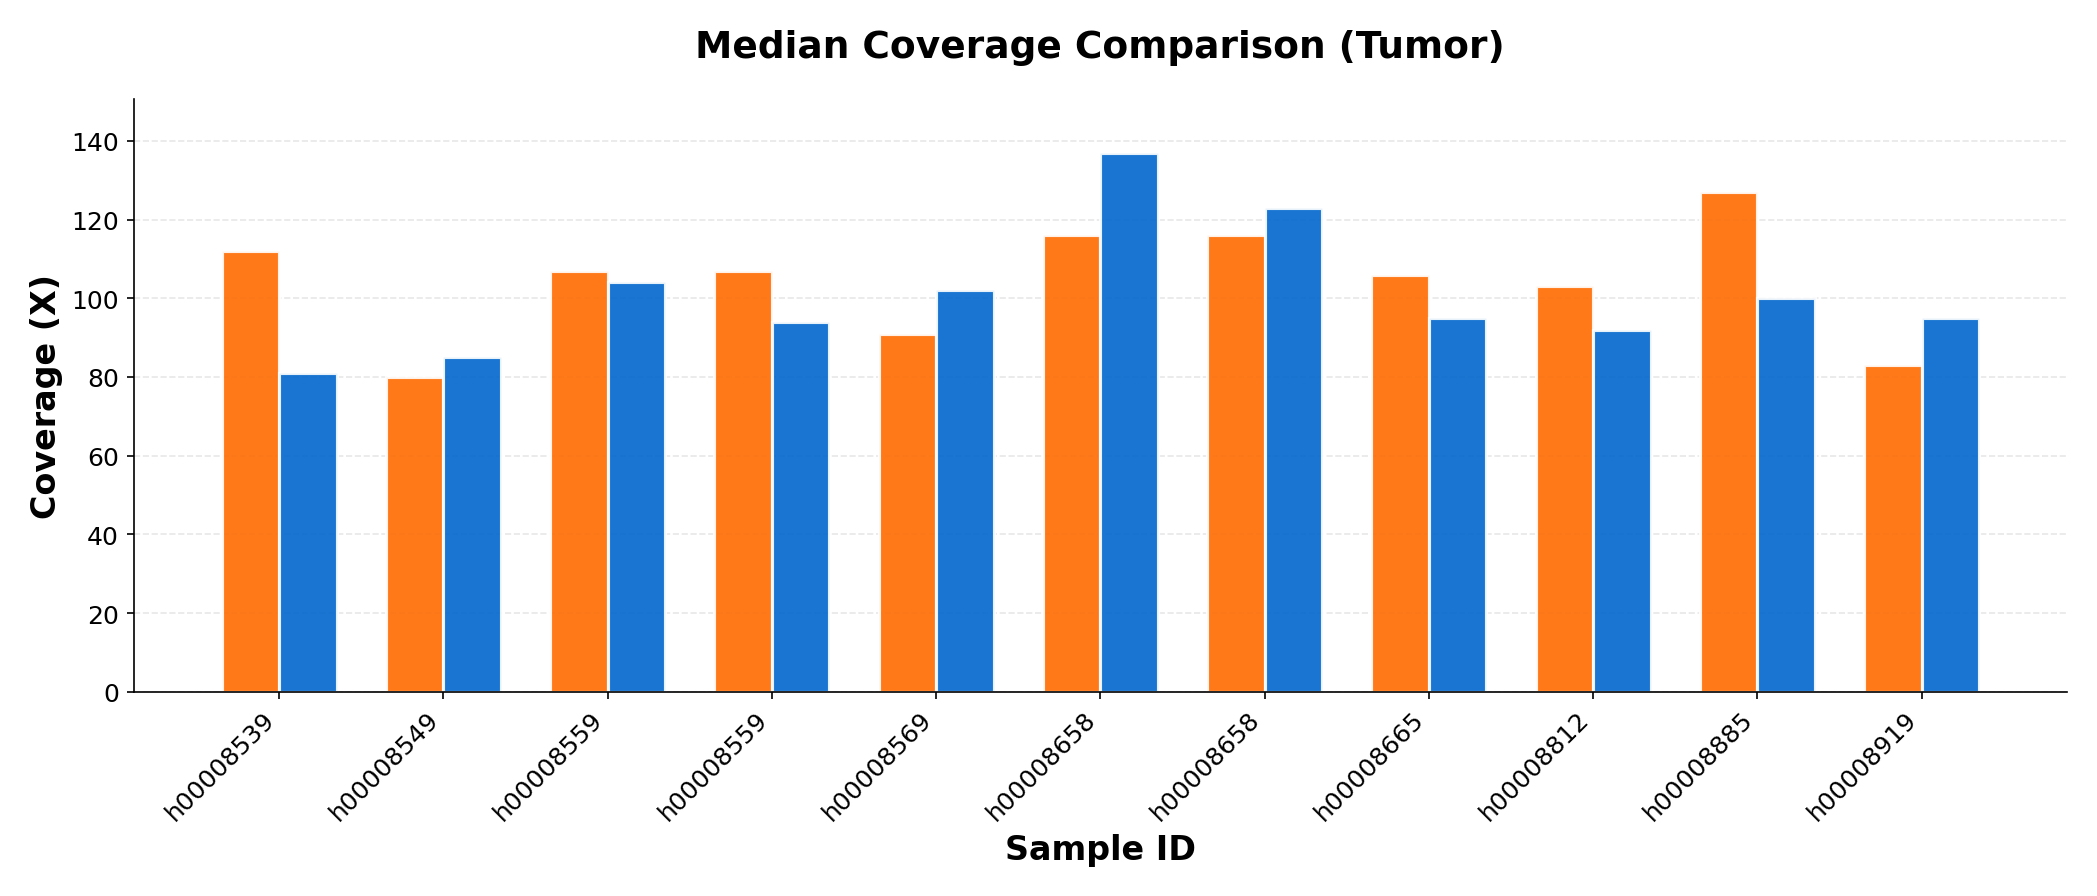

In [64]:
# Median Coverage - Tumor
create_metric_plot(
    tumor_comparison, 
    'MEDIAN_COVERAGE', 
    'Median Coverage Comparison (Tumor)', 
    'Coverage (X)', 
    'tumor_median_coverage.png'
)

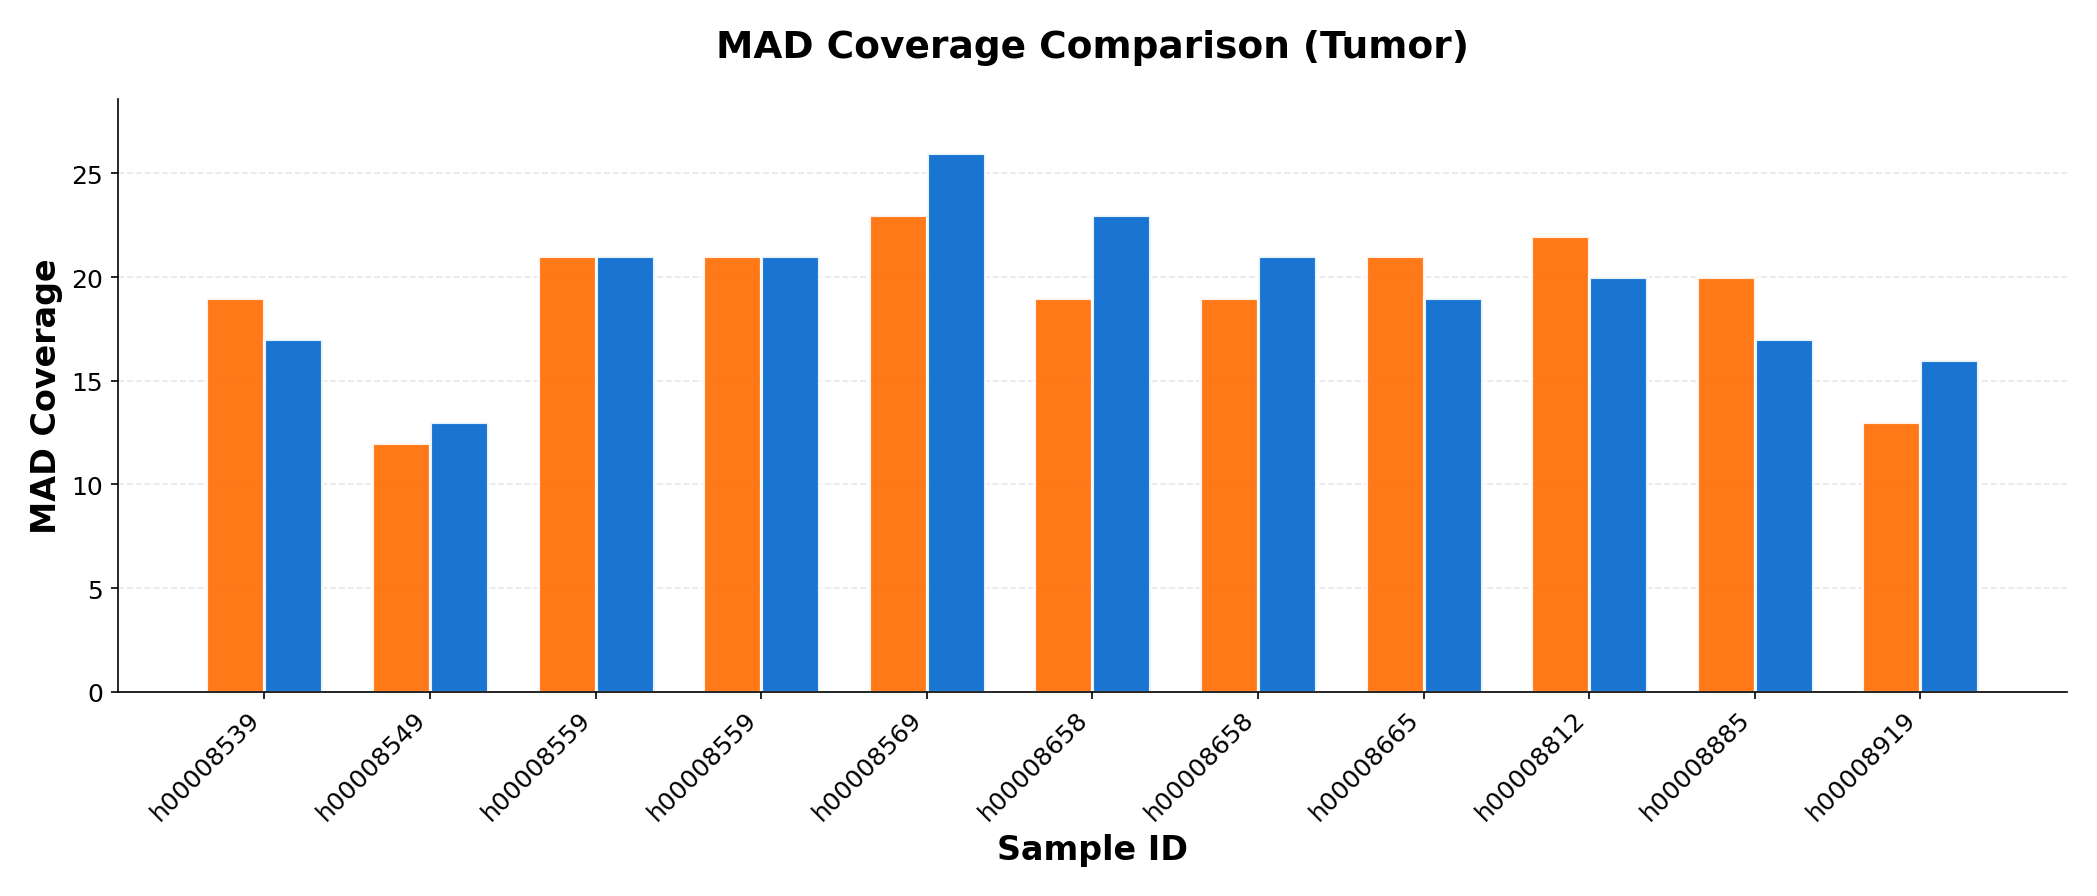

Saved: plots/tumor_mad_coverage.png


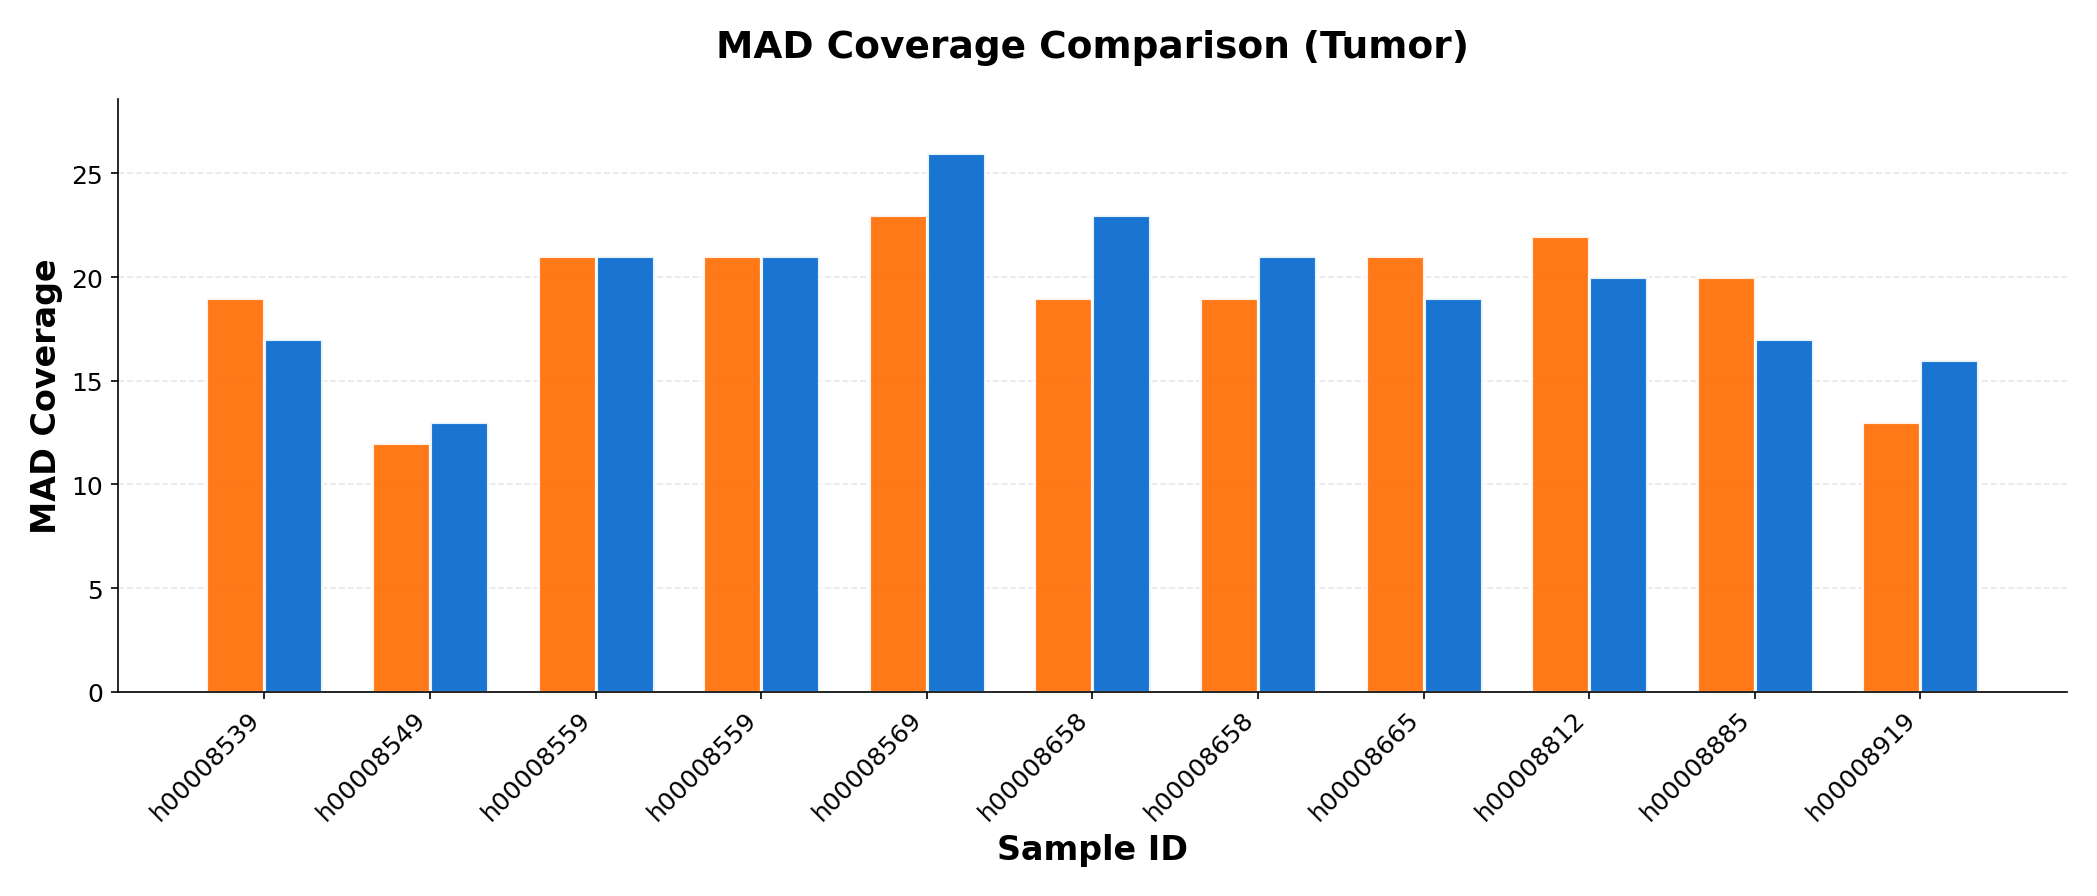

In [65]:
# MAD Coverage - Tumor
create_metric_plot(
    tumor_comparison, 
    'MAD_COVERAGE', 
    'MAD Coverage Comparison (Tumor)', 
    'MAD Coverage', 
    'tumor_mad_coverage.png'
)

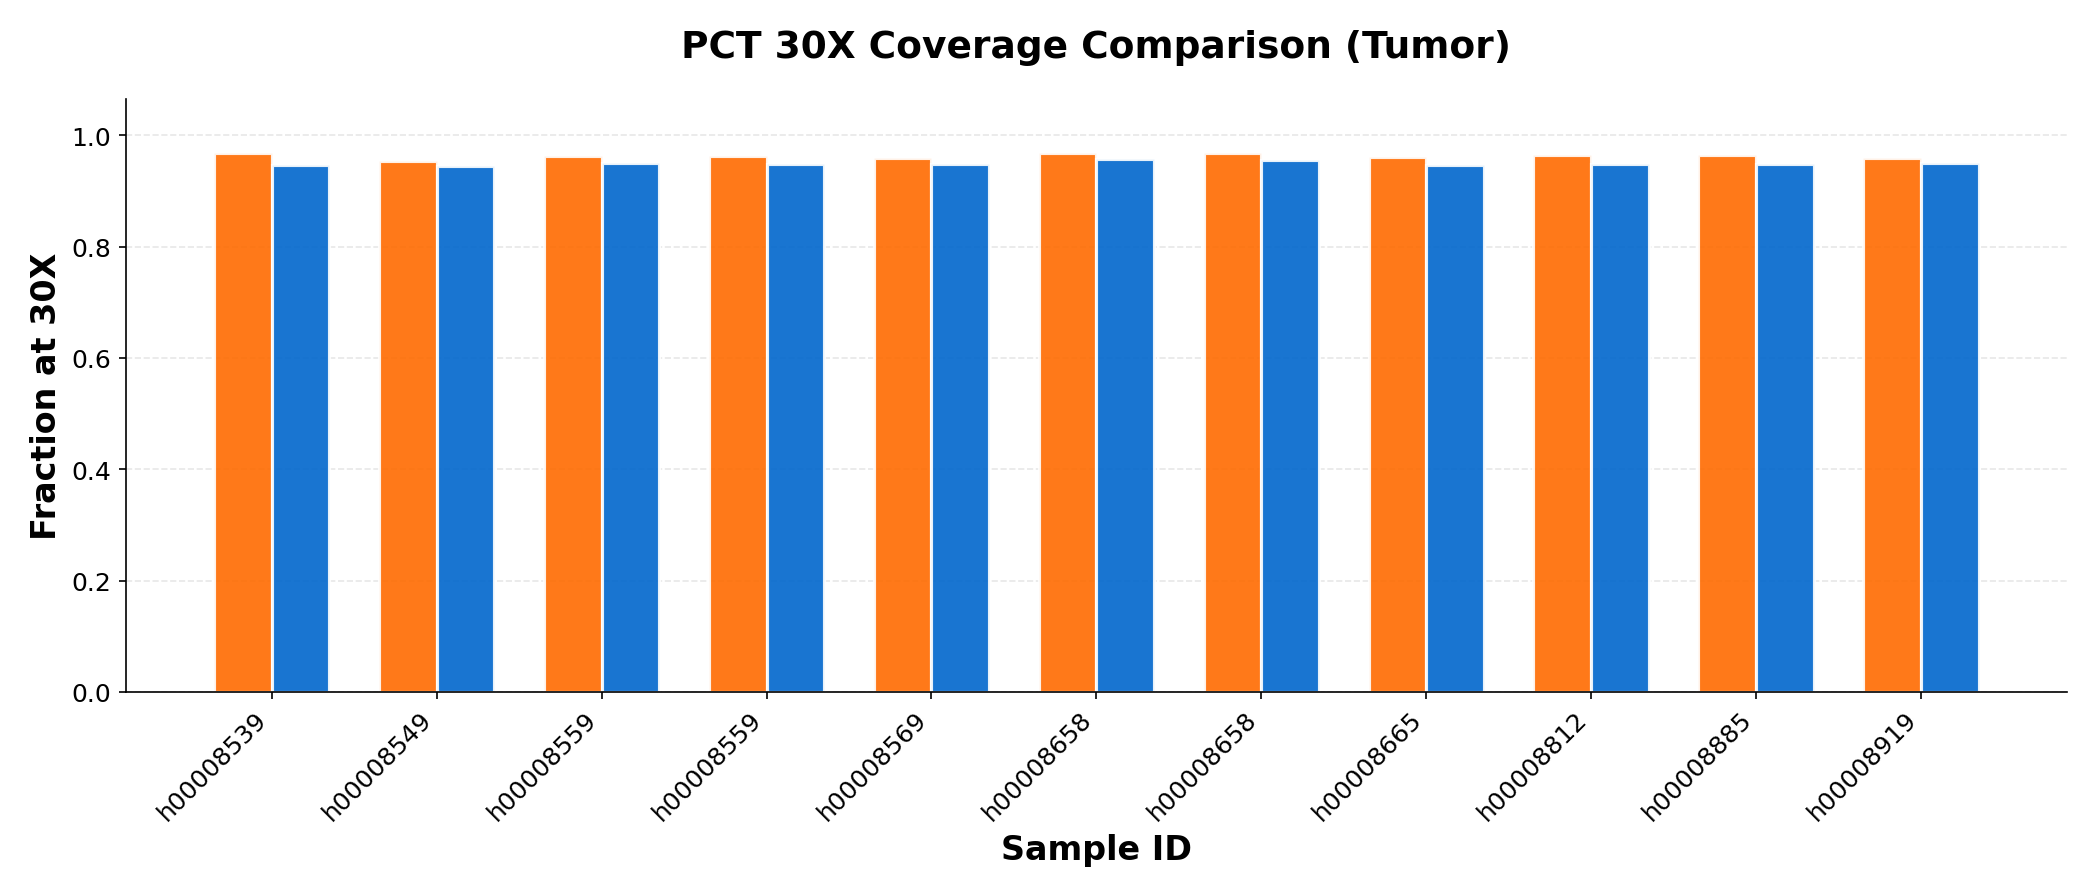

Saved: plots/tumor_pct_30x.png


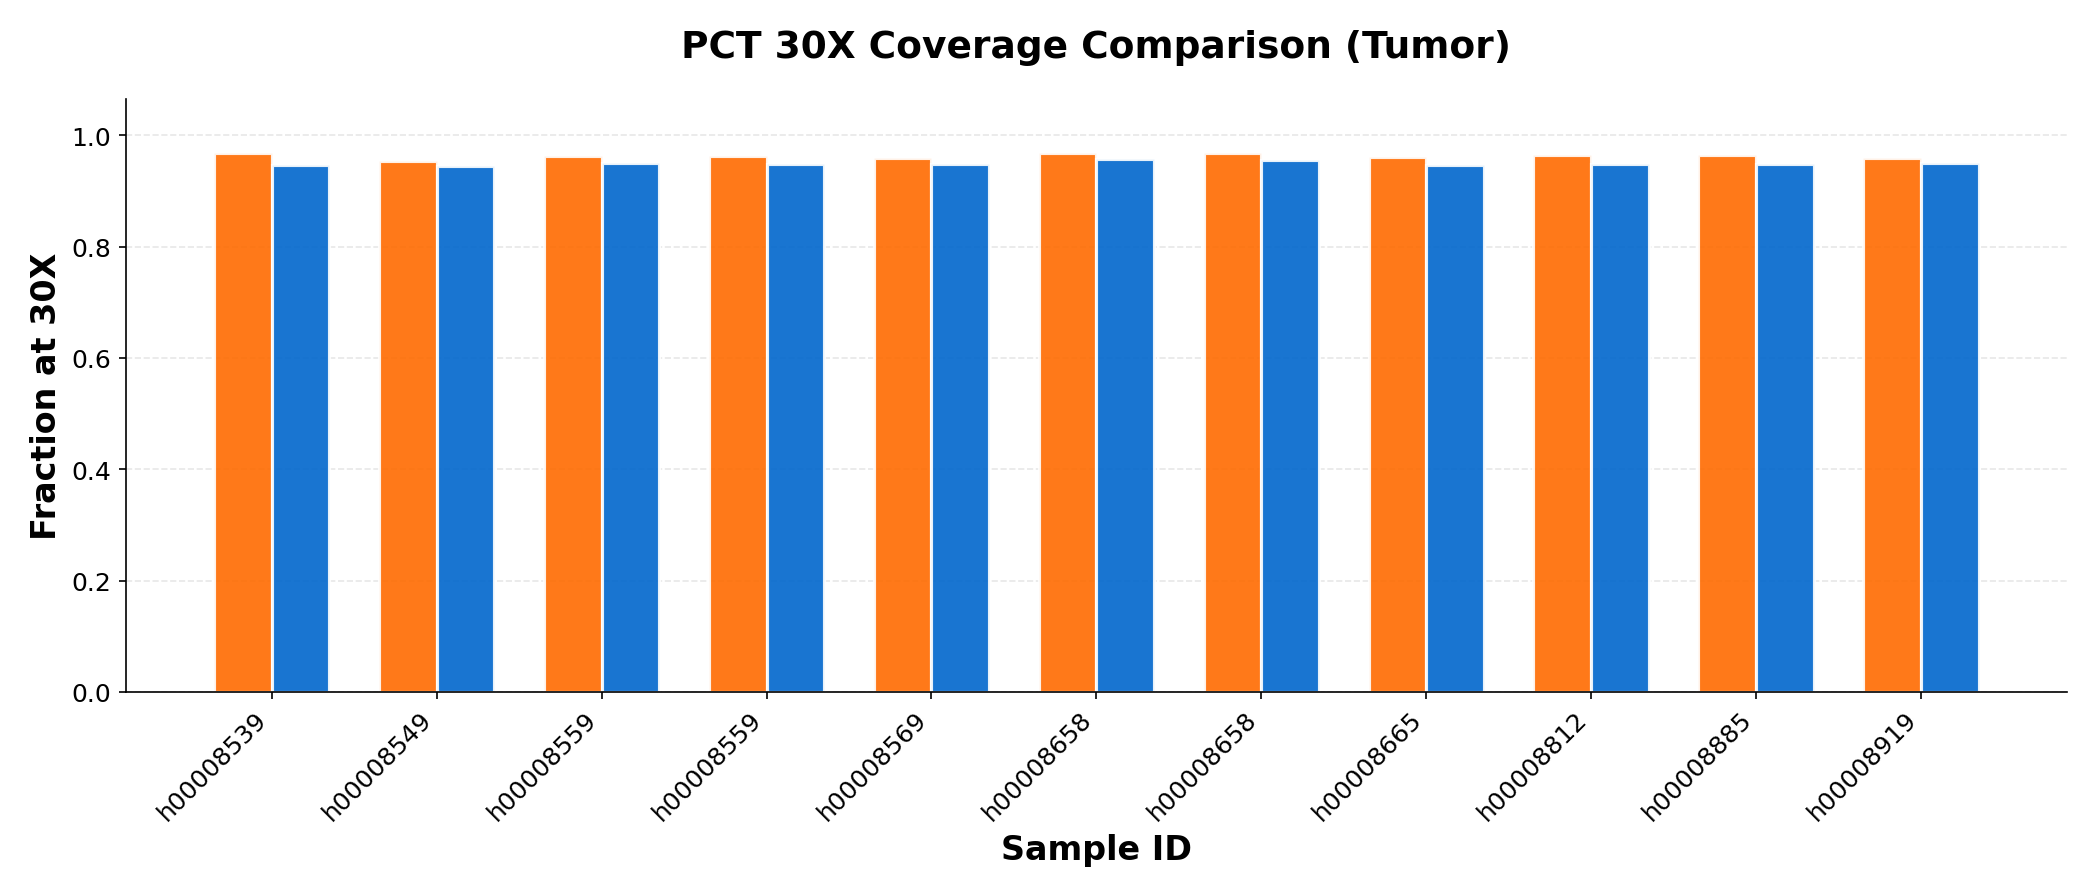

In [66]:
# PCT_30X - Tumor
create_metric_plot(
    tumor_comparison, 
    'PCT_30X', 
    'PCT 30X Coverage Comparison (Tumor)', 
    'Fraction at 30X', 
    'tumor_pct_30x.png'
)

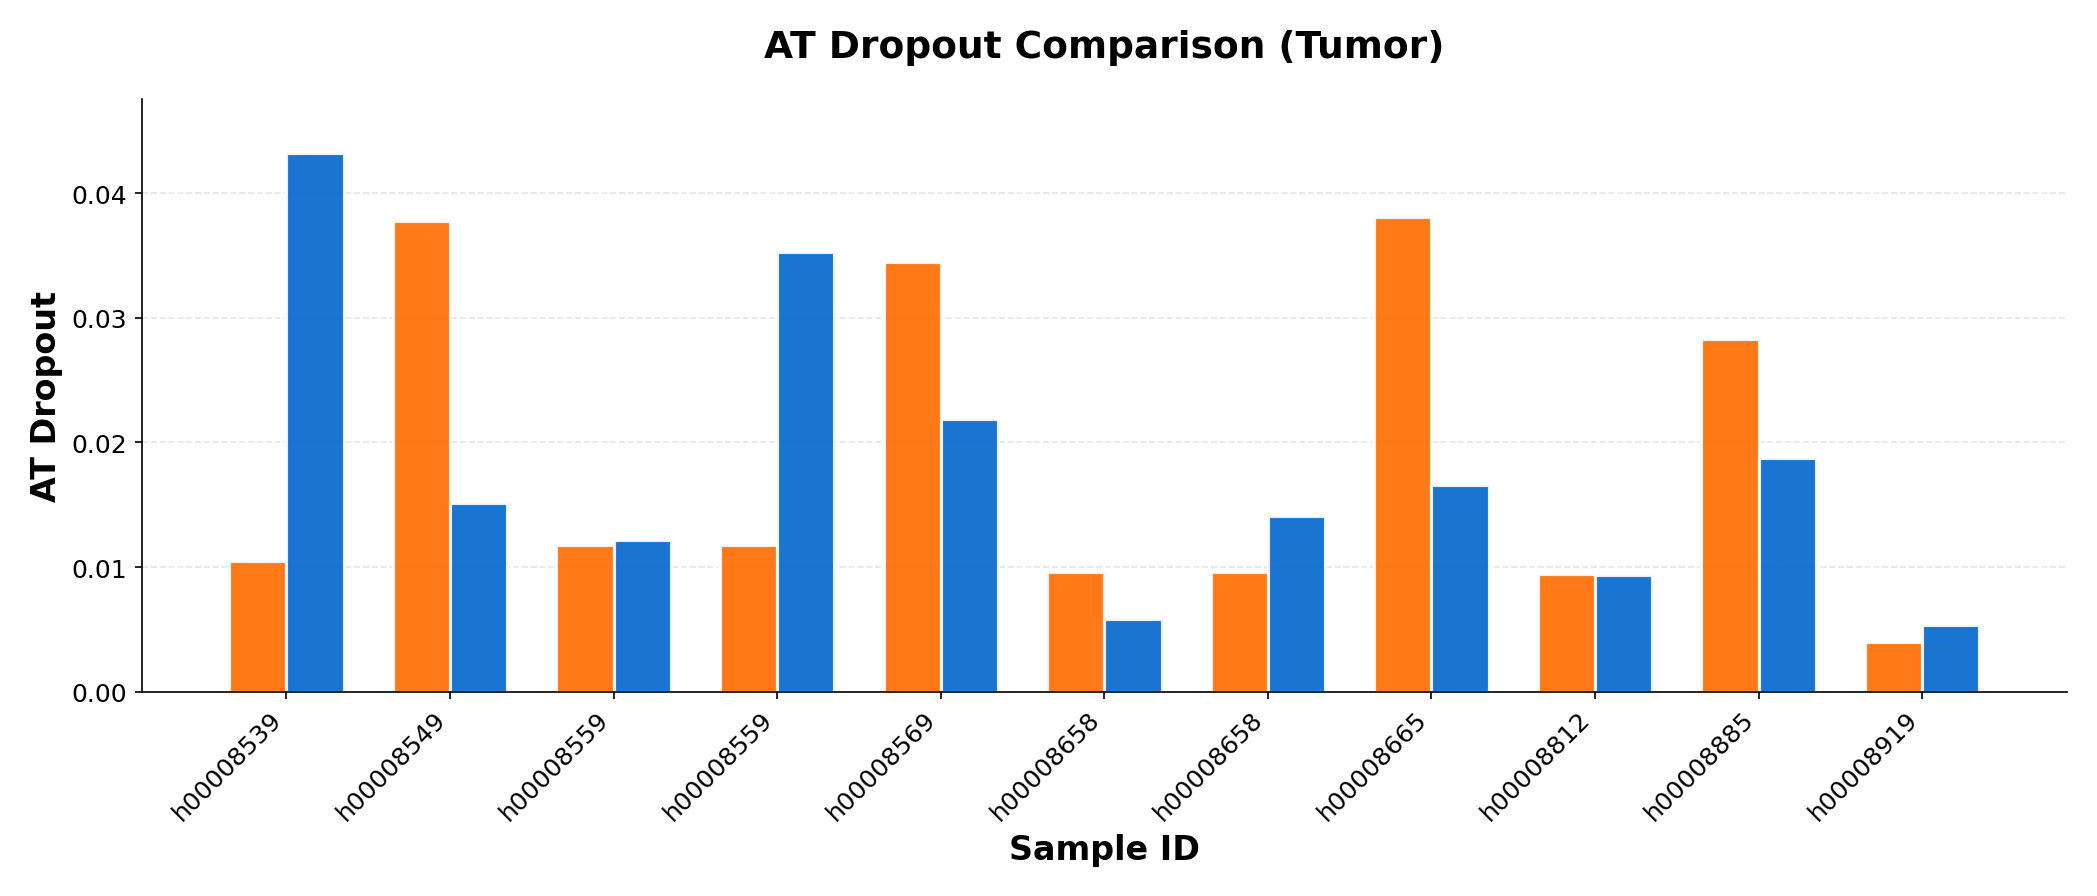

Saved: plots/tumor_at_dropout.png


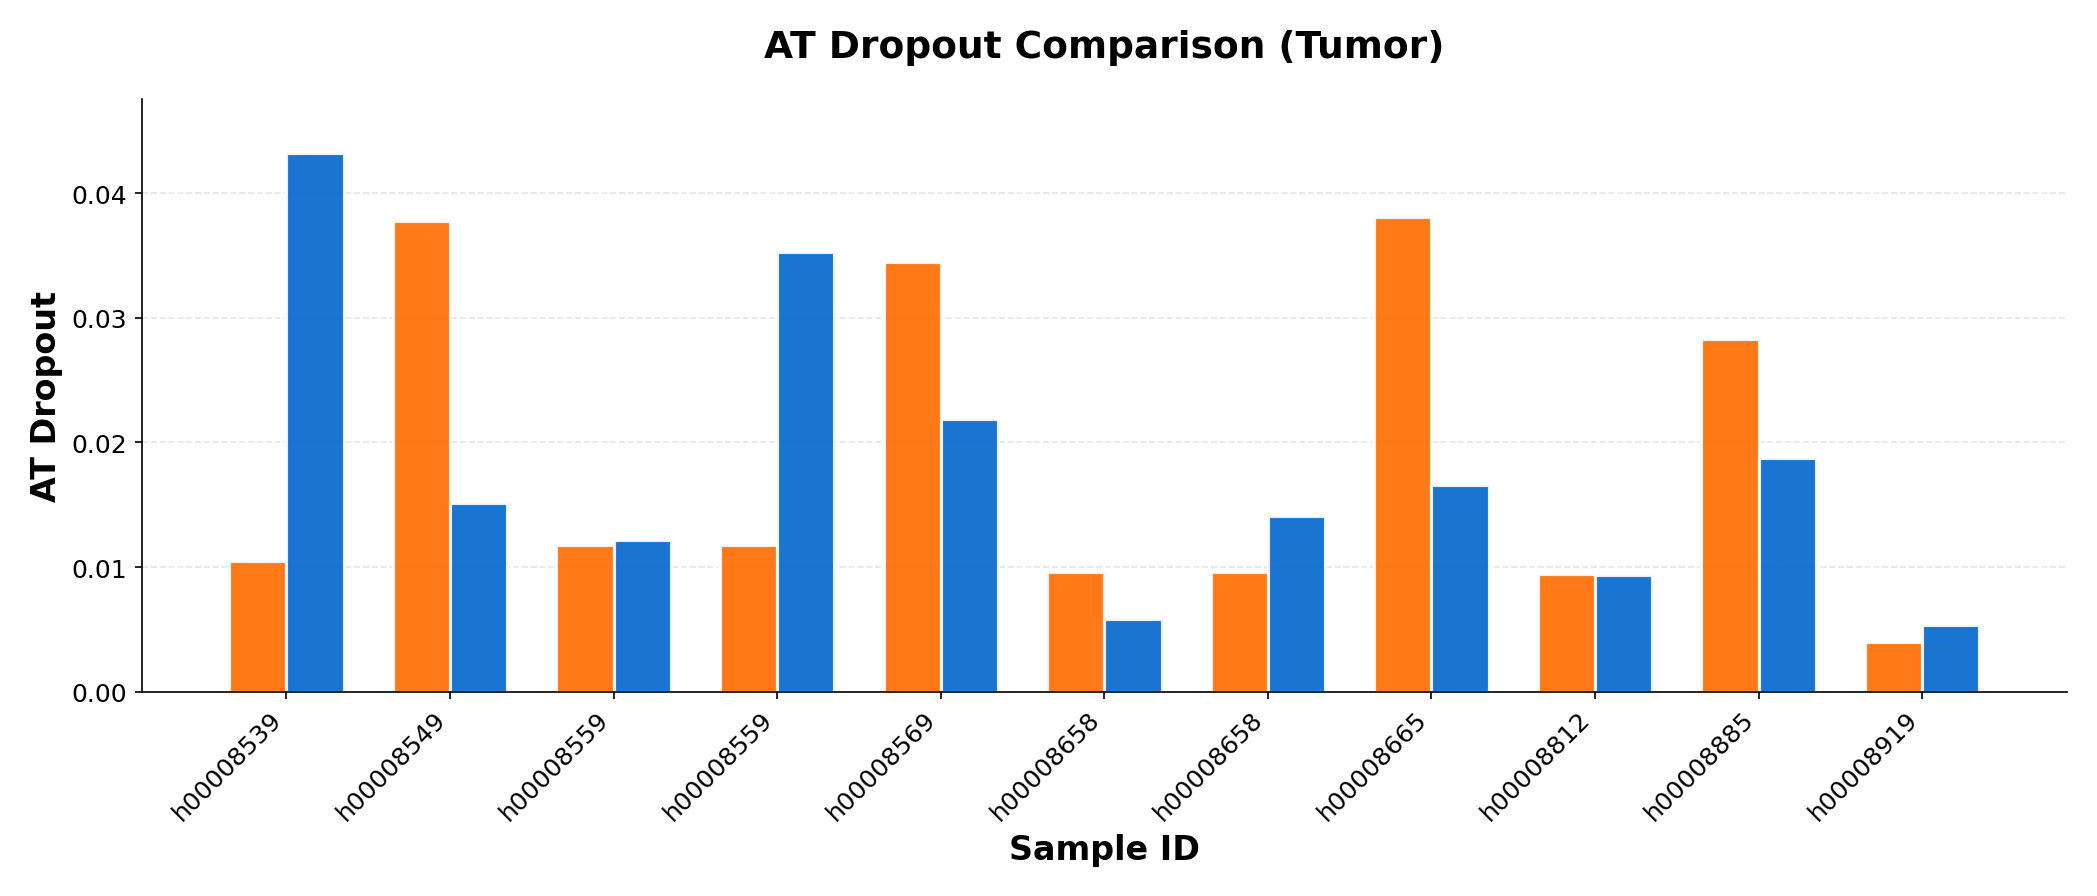

In [67]:
# AT Dropout - Tumor
create_metric_plot(
    tumor_comparison, 
    'AT_DROPOUT', 
    'AT Dropout Comparison (Tumor)', 
    'AT Dropout', 
    'tumor_at_dropout.png'
)

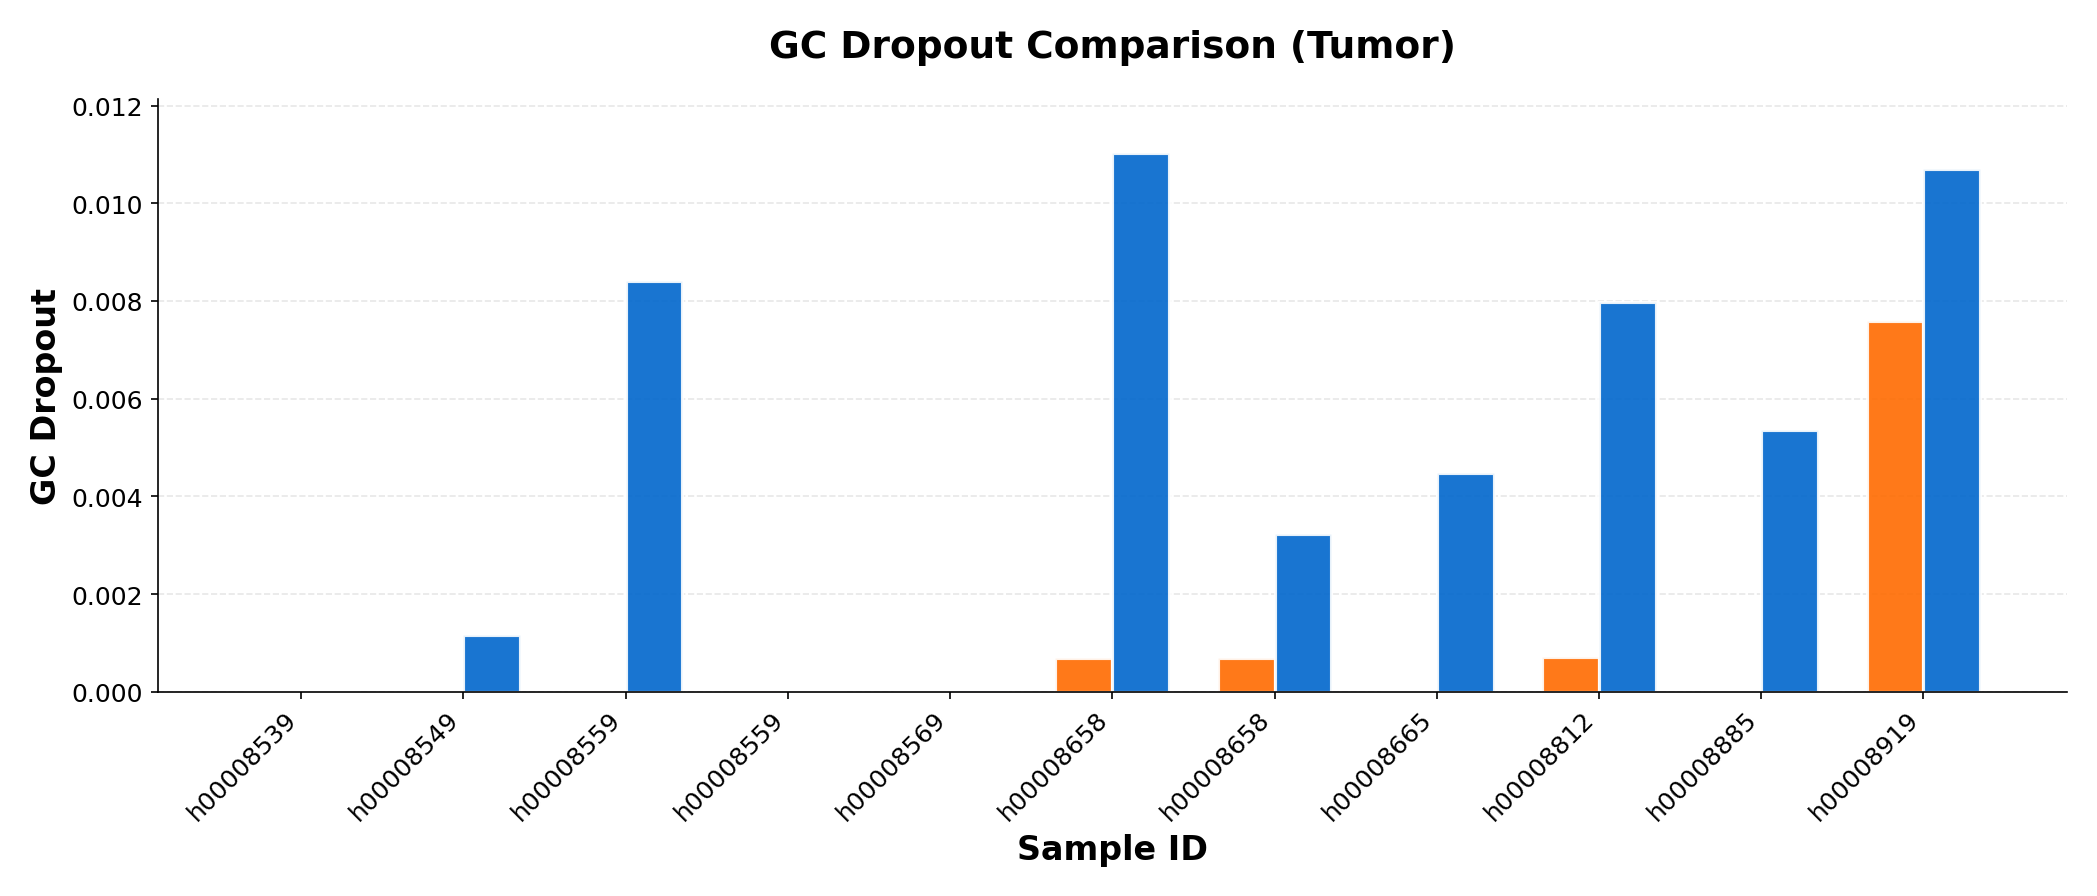

Saved: plots/tumor_gc_dropout.png


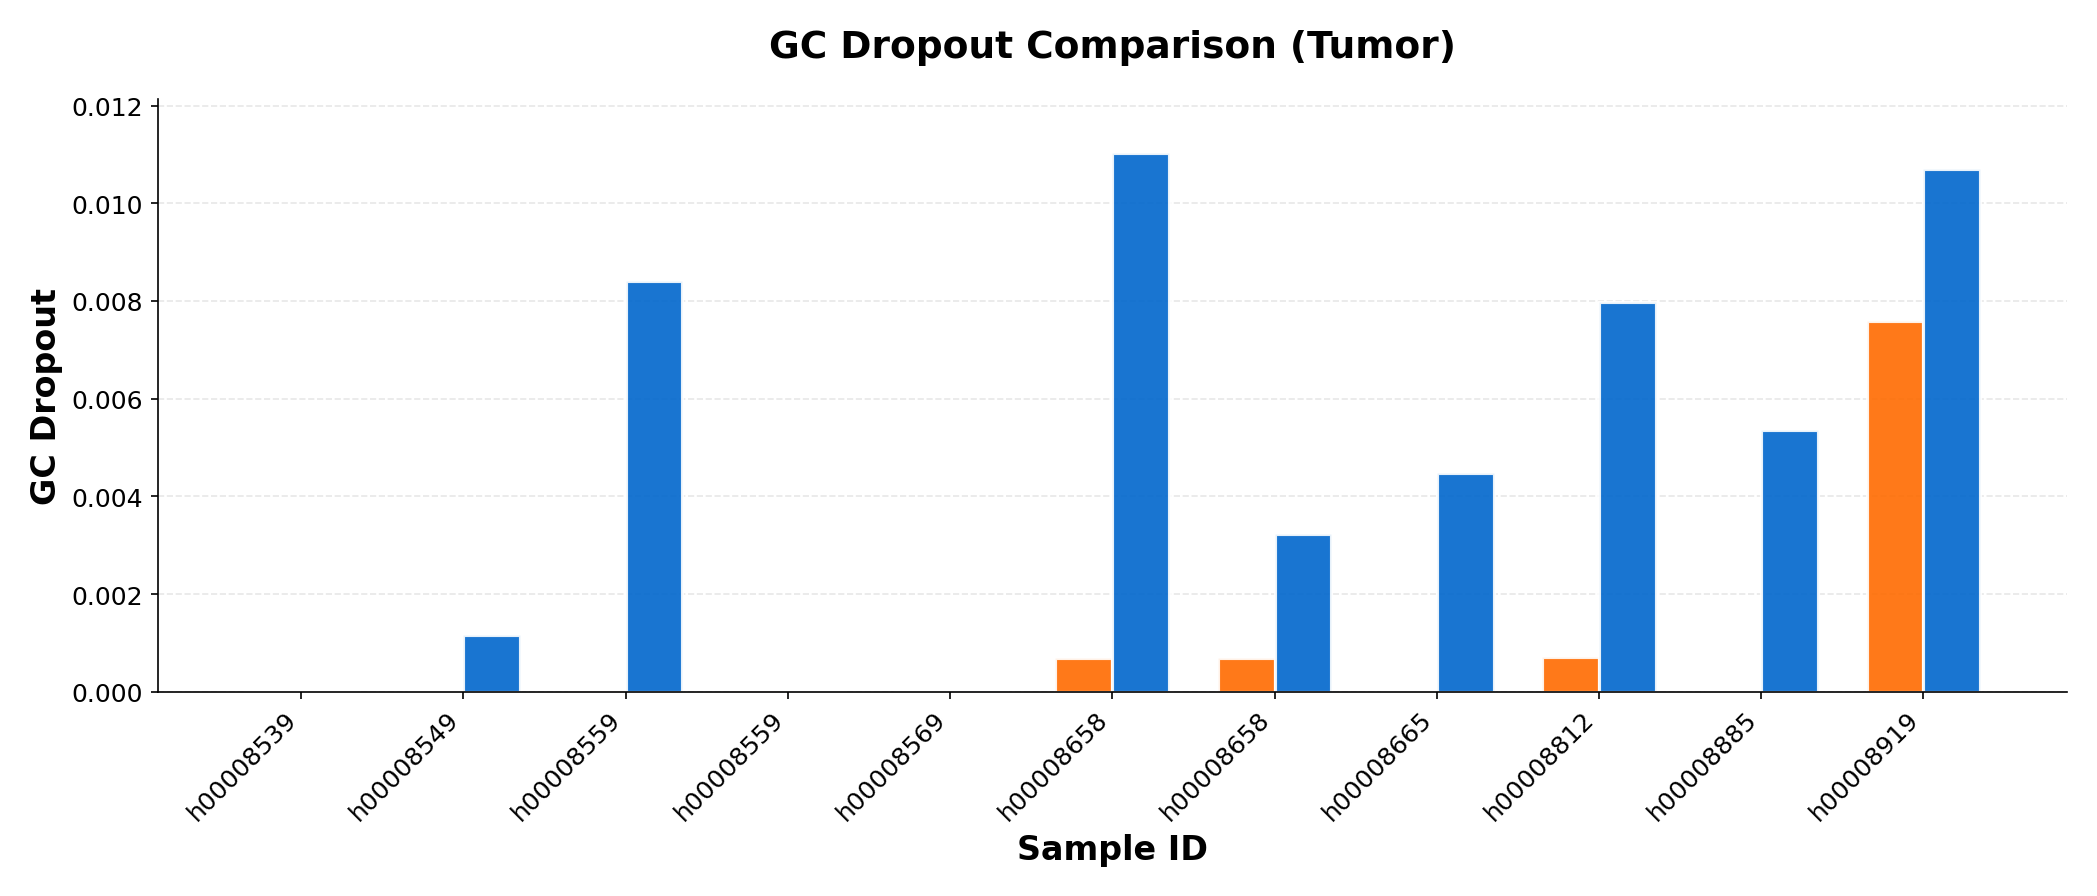

In [68]:
# GC Dropout - Tumor
create_metric_plot(
    tumor_comparison, 
    'GC_DROPOUT', 
    'GC Dropout Comparison (Tumor)', 
    'GC Dropout', 
    'tumor_gc_dropout.png'
)

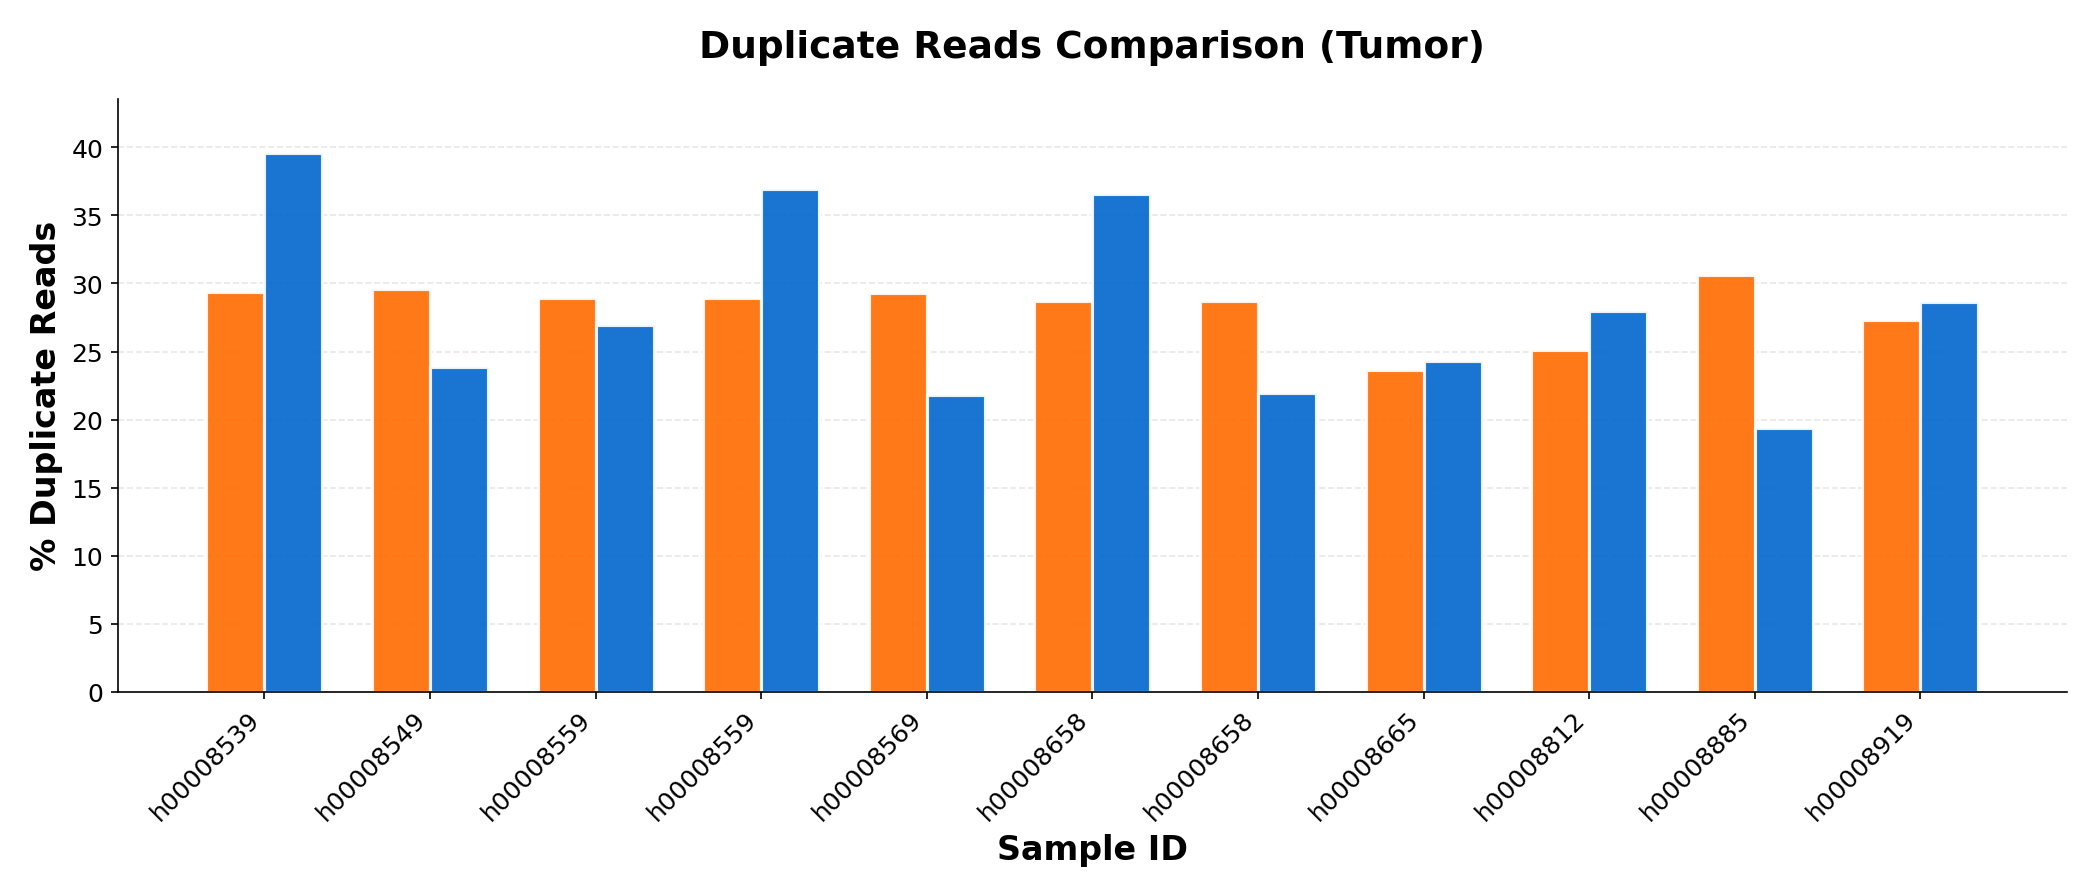

Saved: plots/tumor_pct_duplicate.png


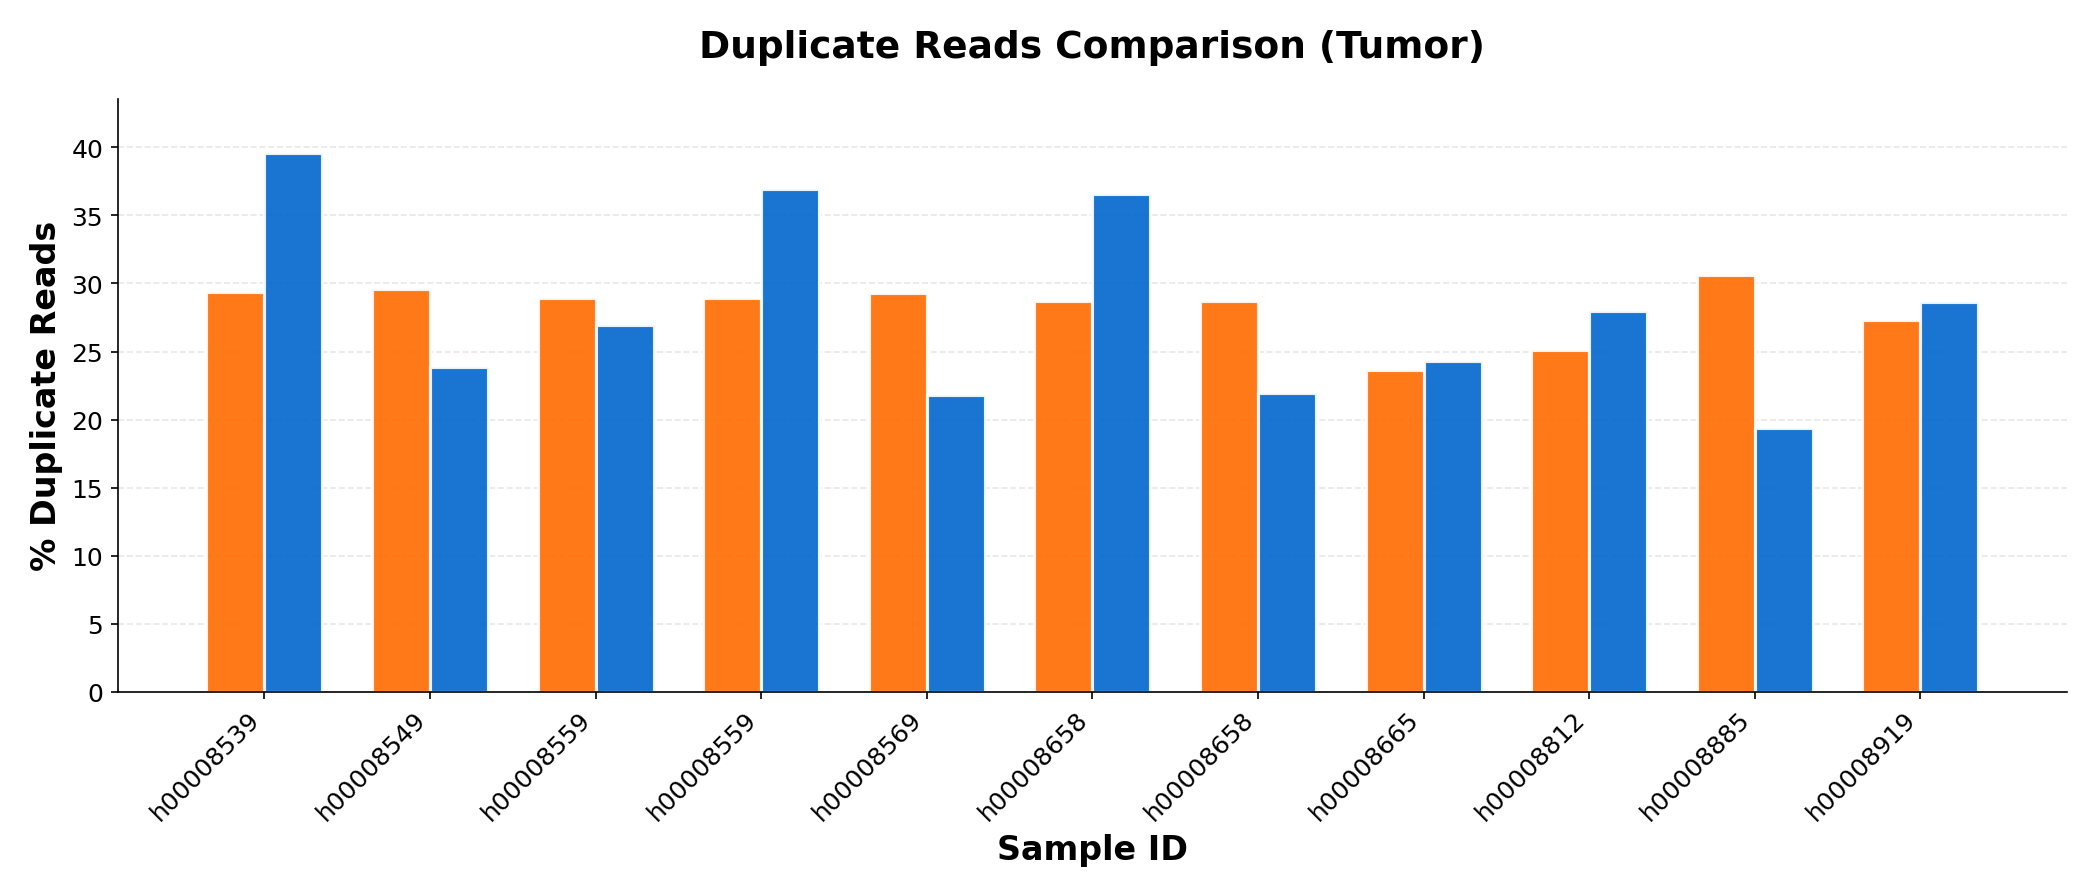

In [69]:
# % Duplicate Reads - Tumor
create_metric_plot(
    tumor_comparison, 
    'PCT_DUPLICATE', 
    'Duplicate Reads Comparison (Tumor)', 
    '% Duplicate Reads', 
    'tumor_pct_duplicate.png'
)

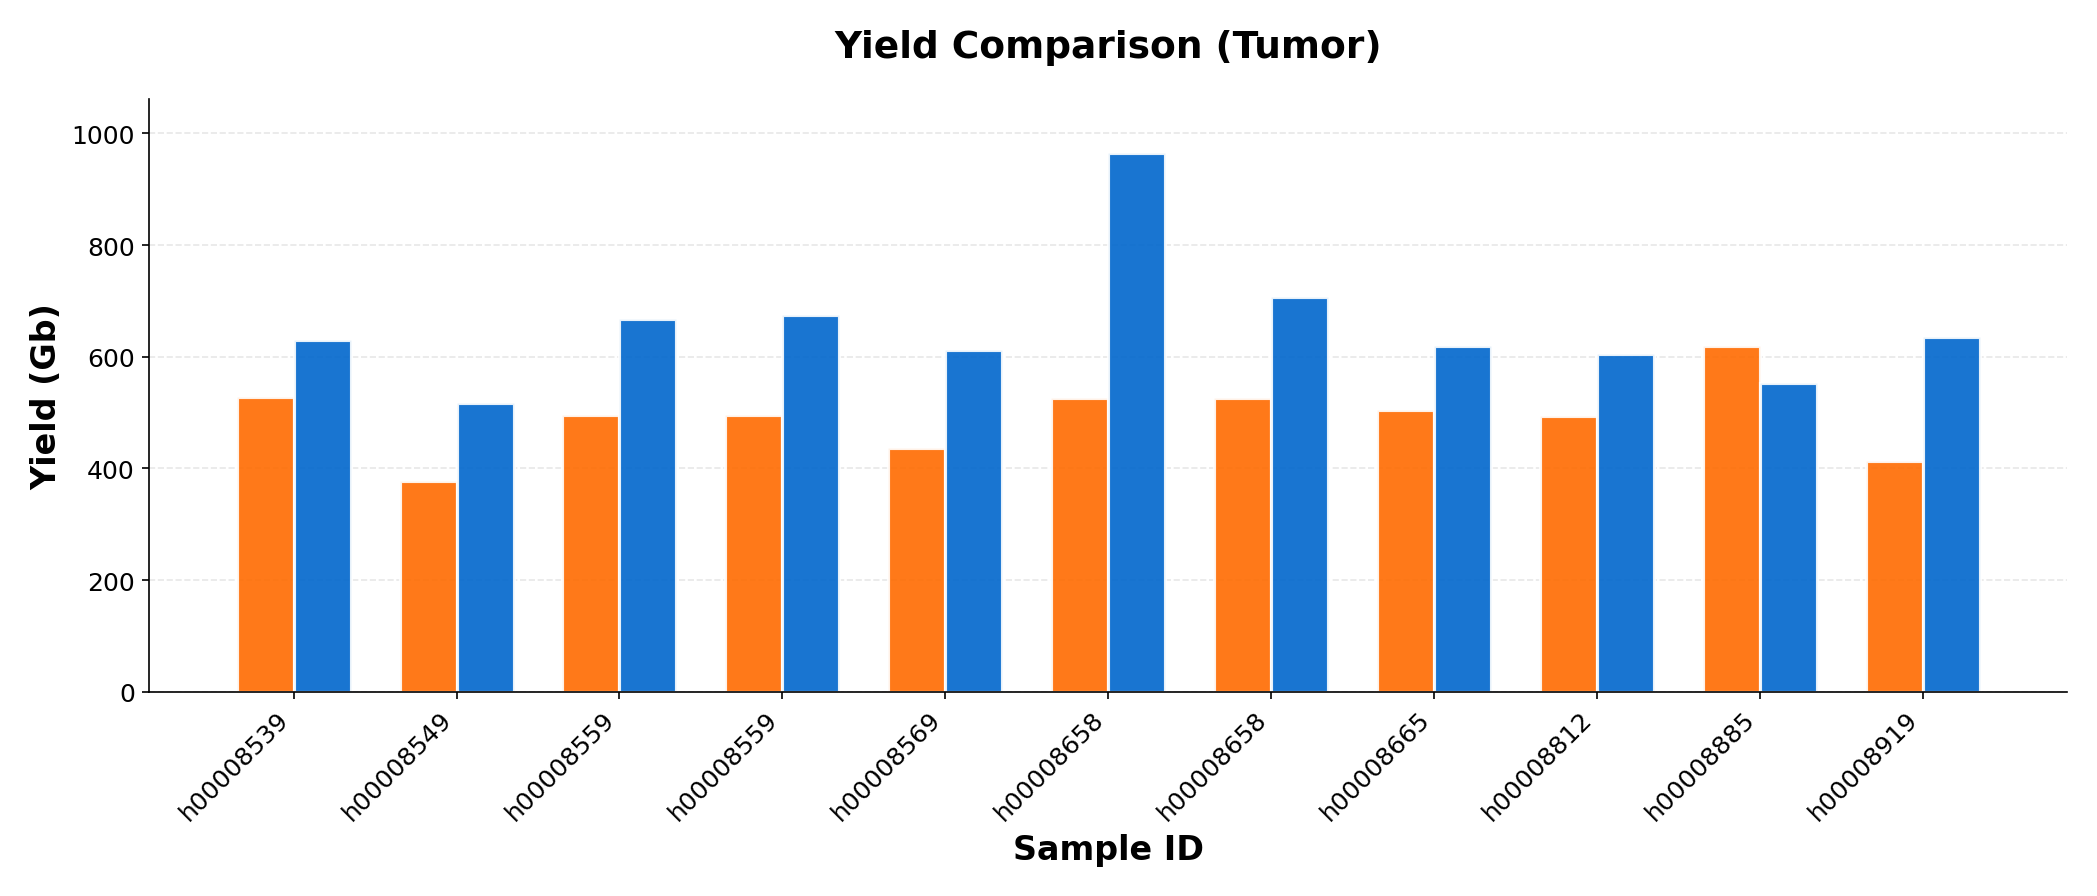

Saved: plots/tumor_yield.png


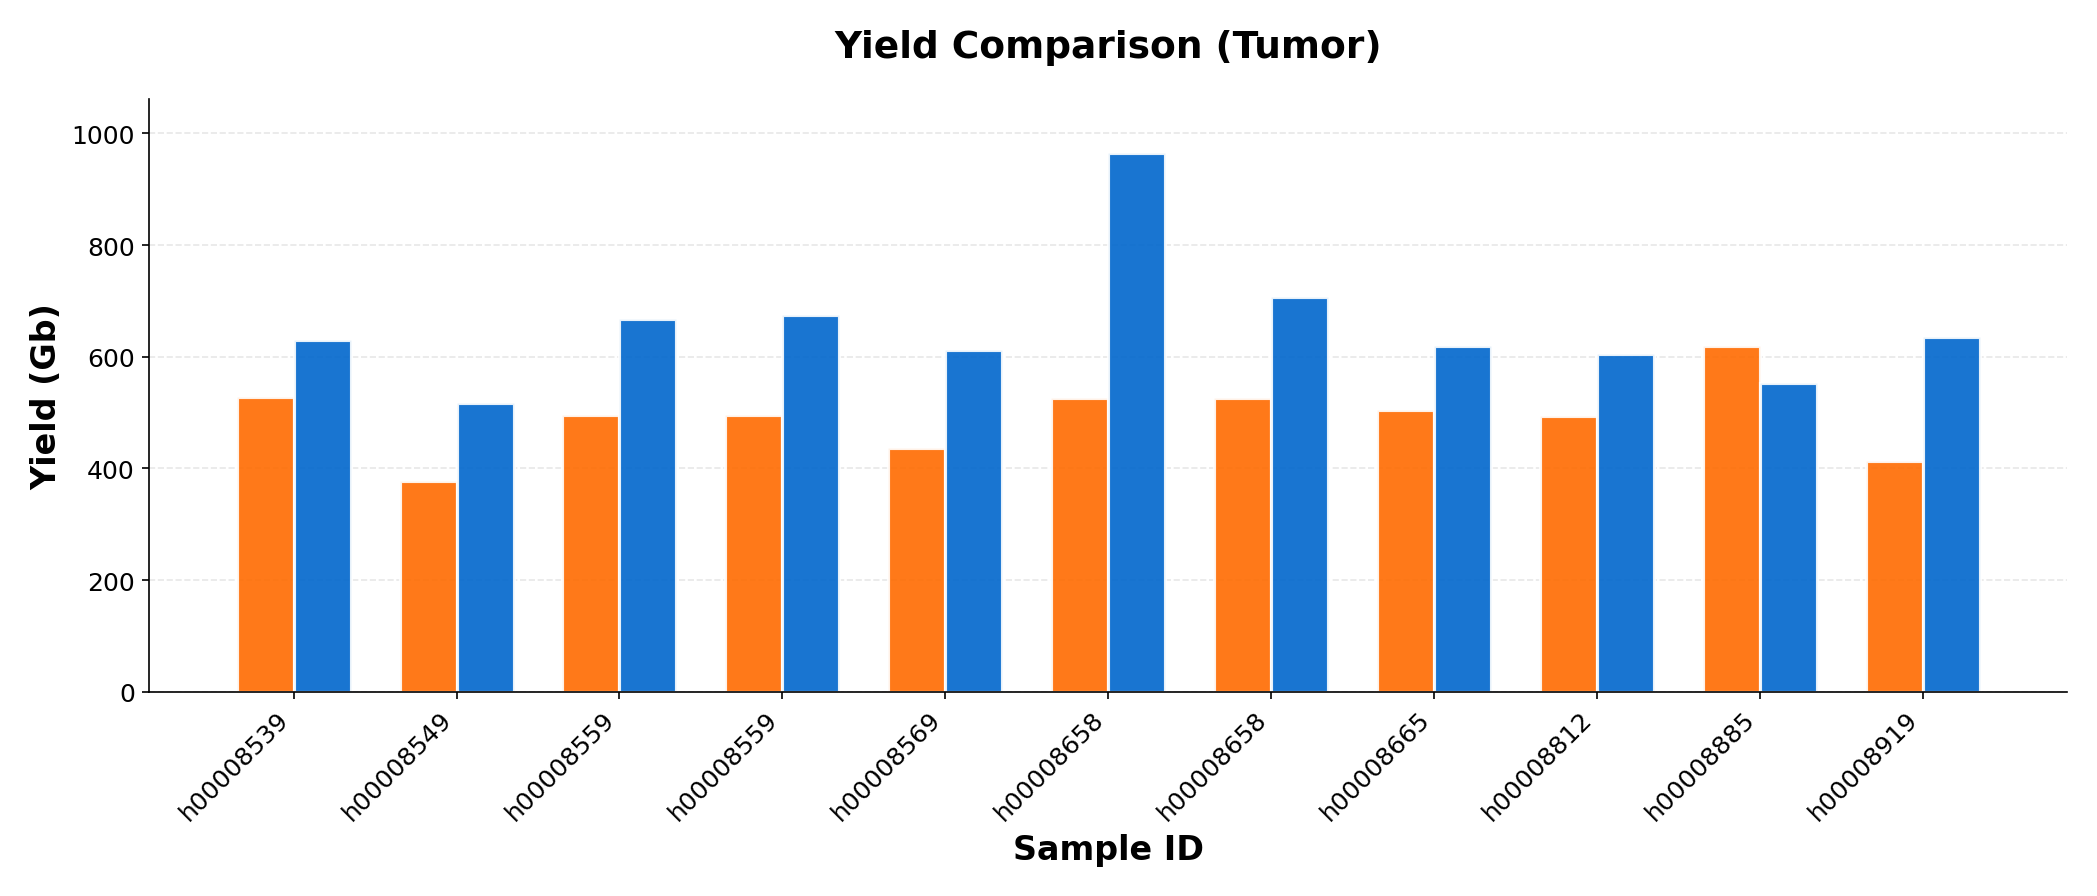

In [70]:
# Yield - Tumor
create_metric_plot(
    tumor_comparison, 
    'Yield', 
    'Yield Comparison (Tumor)', 
    'Yield (Gb)', 
    'tumor_yield.png'
)

## 10. Normal Sample Metrics - Individual Plots

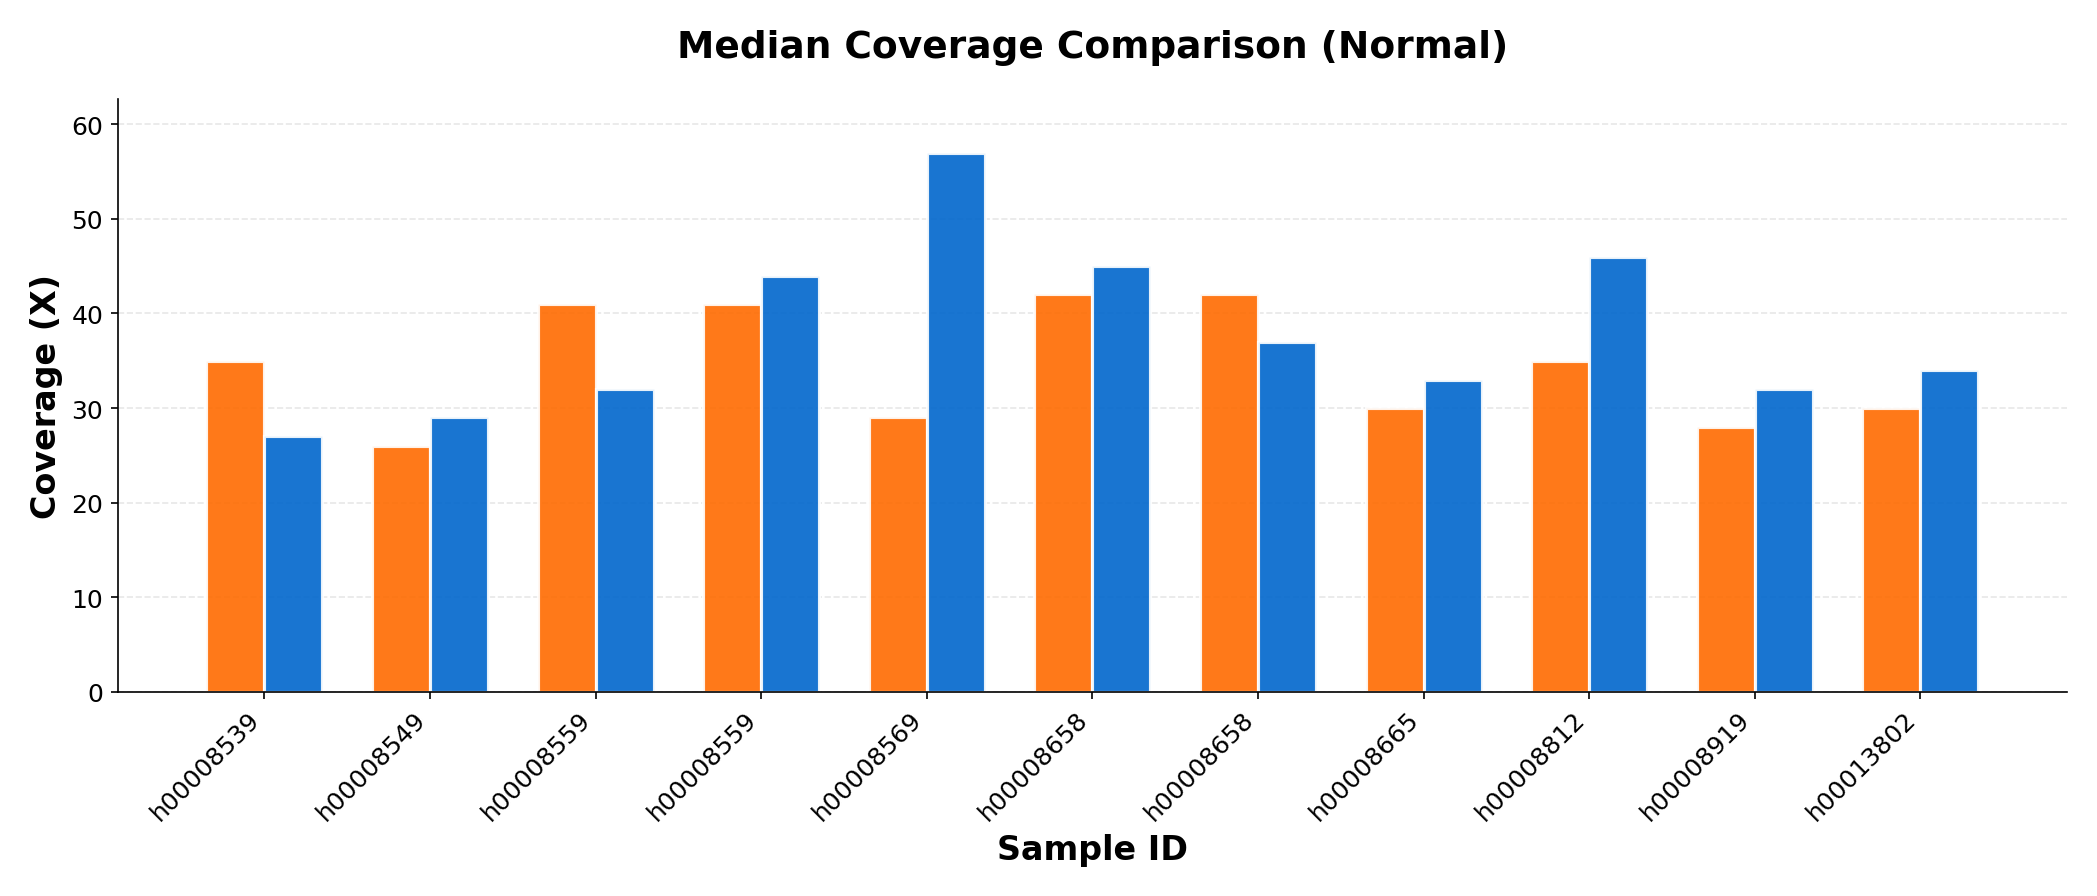

Saved: plots/normal_median_coverage.png


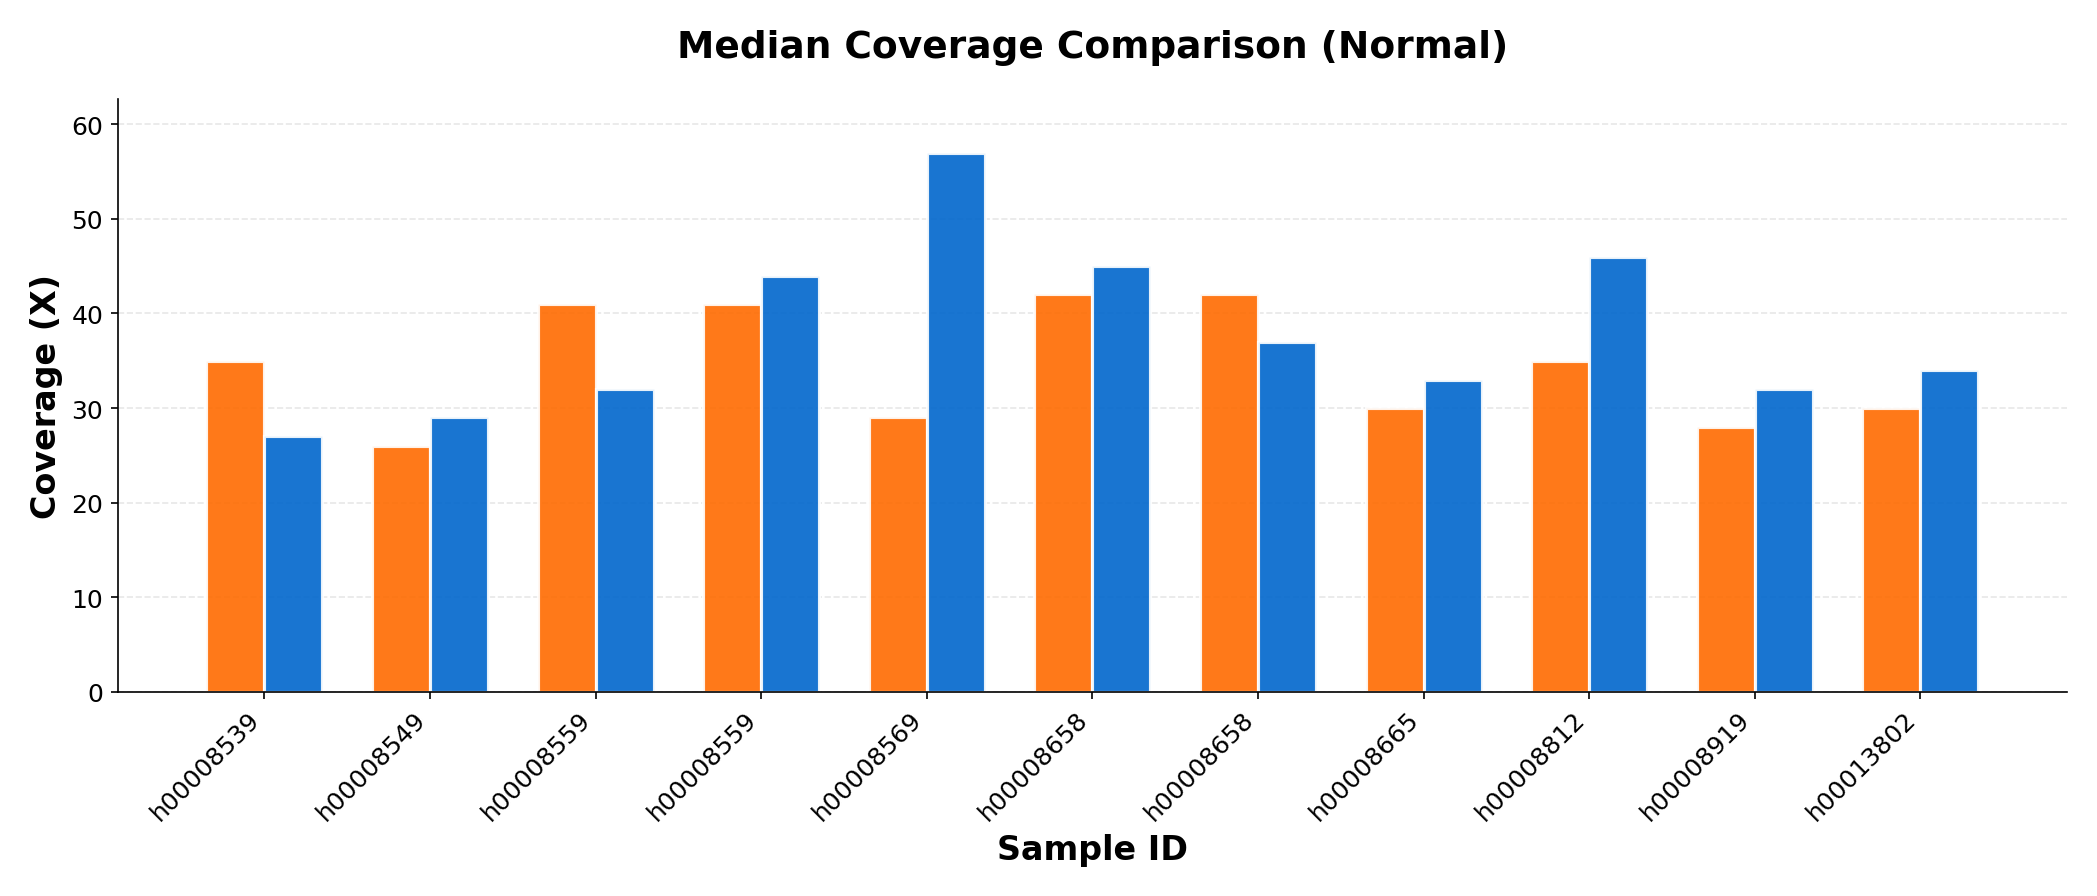

In [71]:
# Median Coverage - Normal
create_metric_plot(
    normal_comparison, 
    'MEDIAN_COVERAGE', 
    'Median Coverage Comparison (Normal)', 
    'Coverage (X)', 
    'normal_median_coverage.png'
)

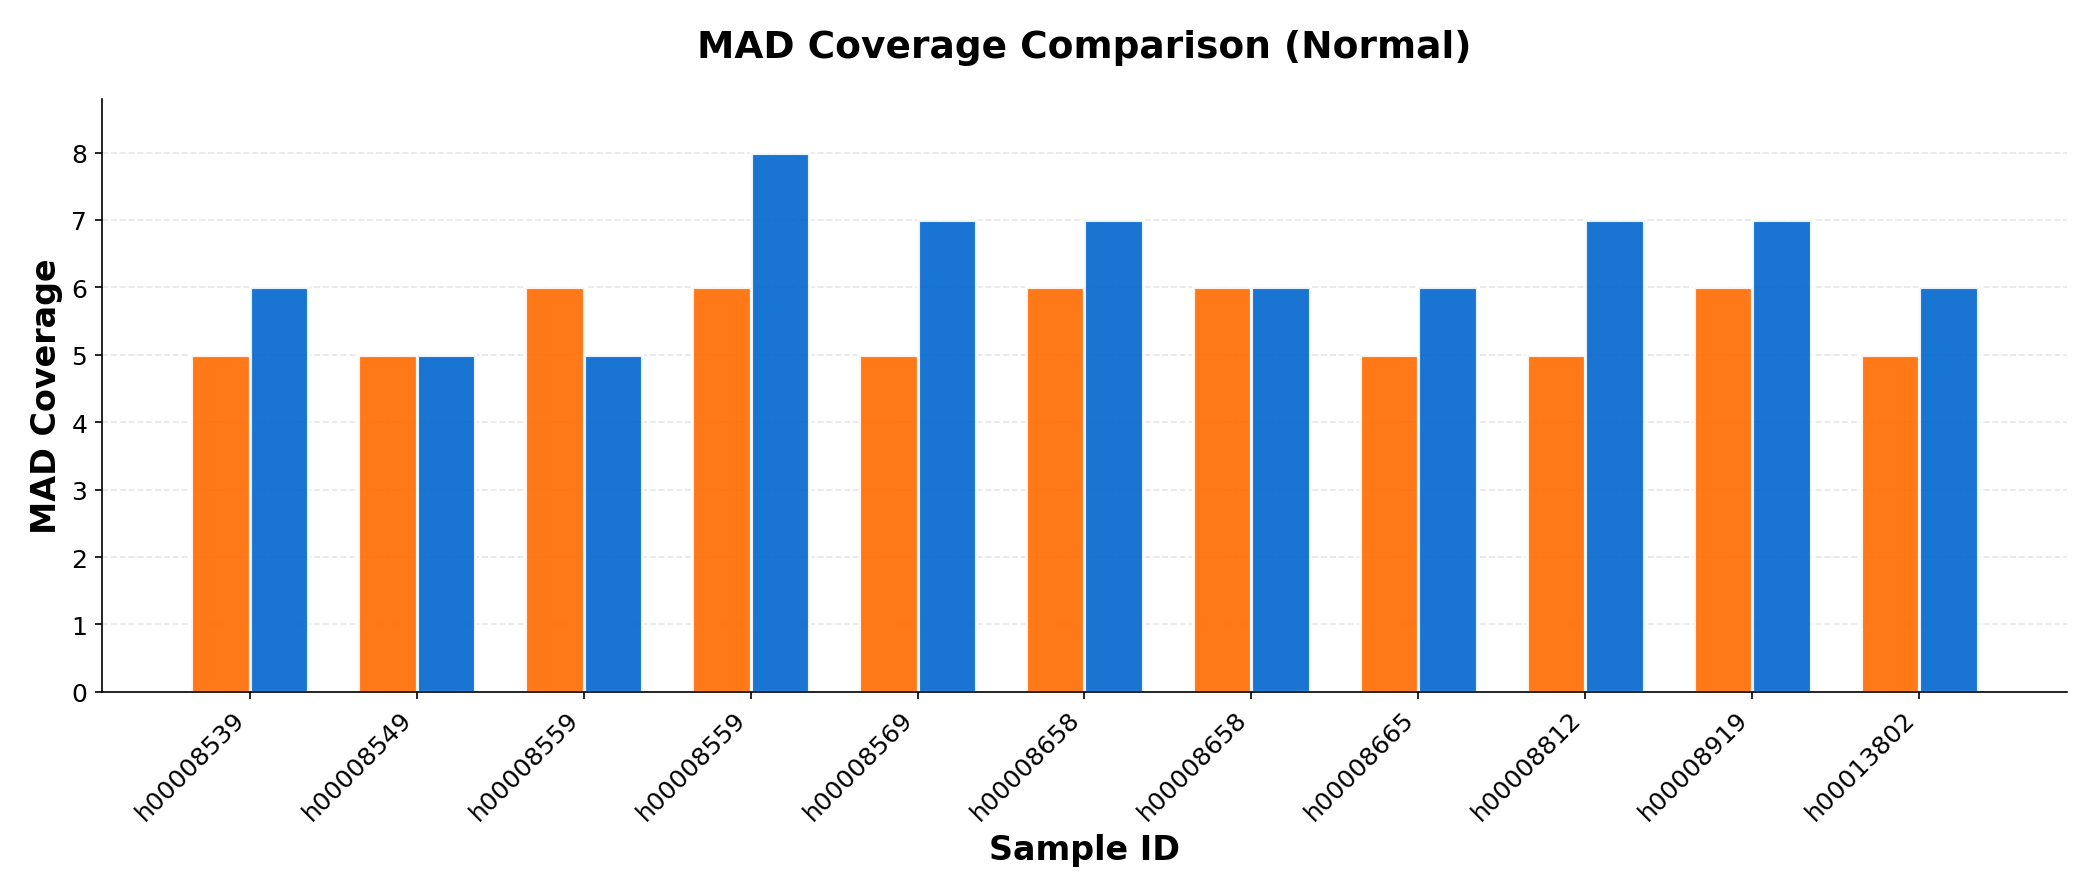

Saved: plots/normal_mad_coverage.png


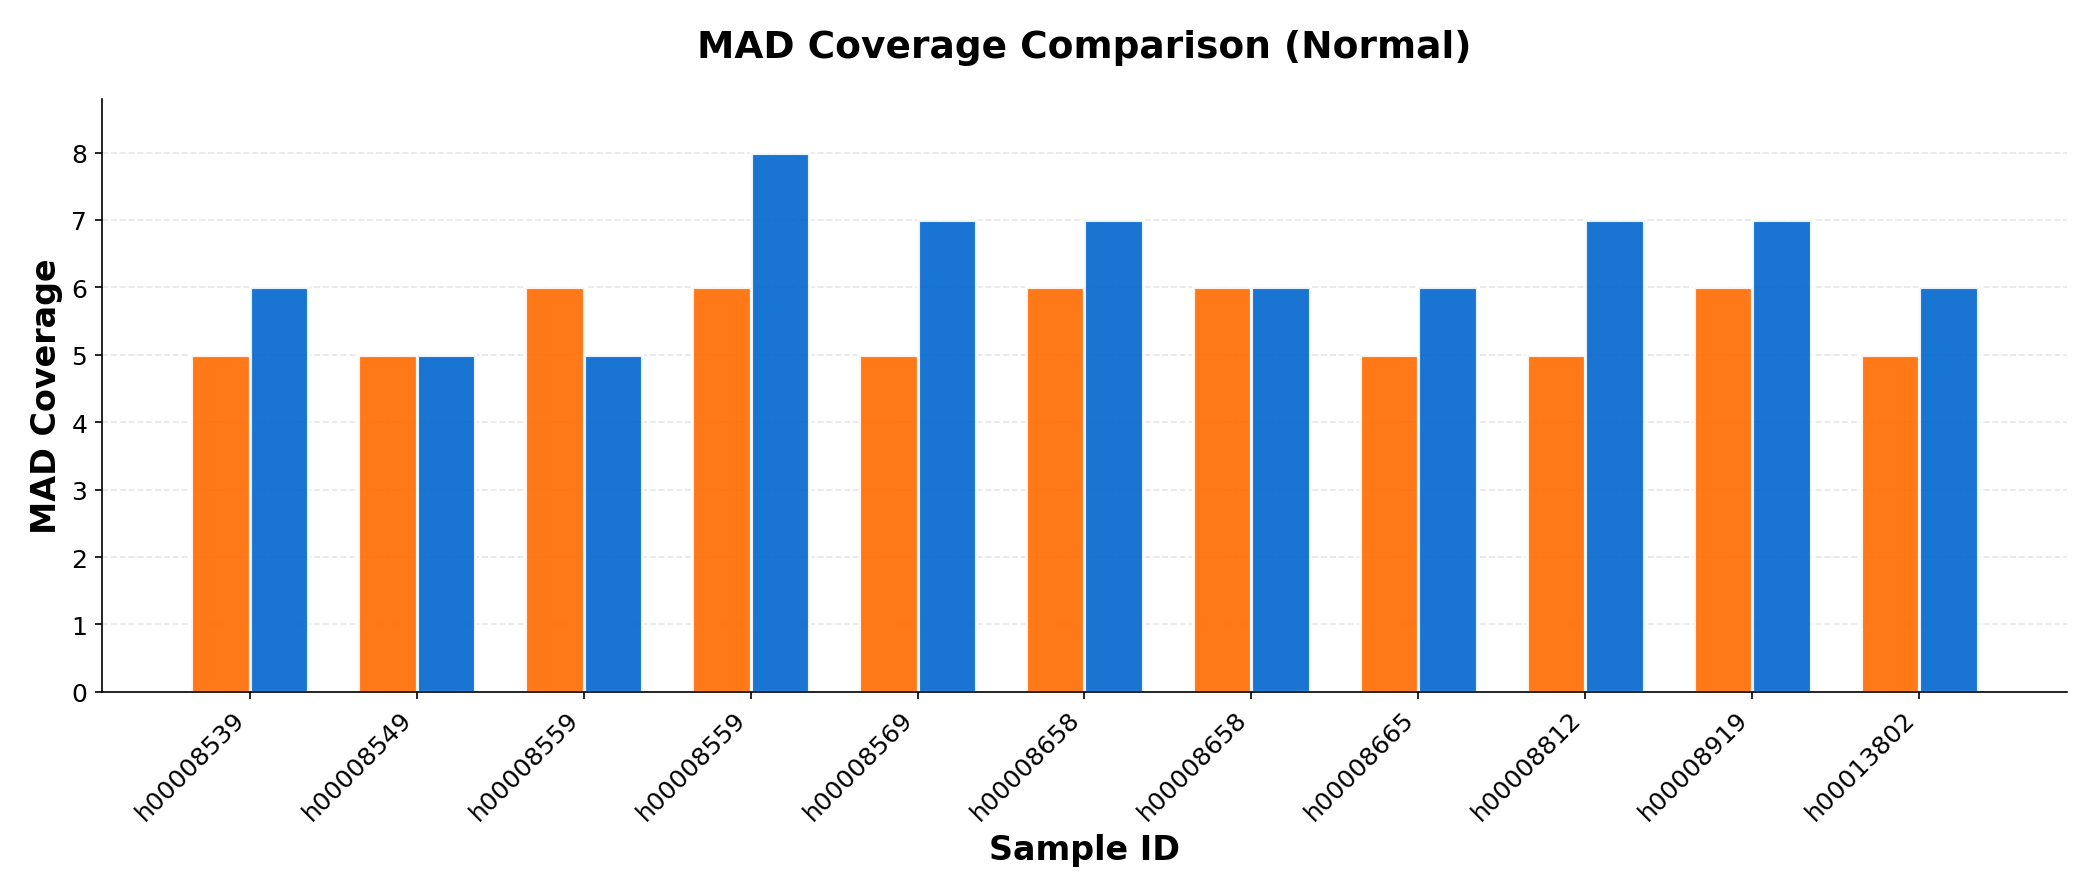

In [72]:
# MAD Coverage - Normal
create_metric_plot(
    normal_comparison, 
    'MAD_COVERAGE', 
    'MAD Coverage Comparison (Normal)', 
    'MAD Coverage', 
    'normal_mad_coverage.png'
)

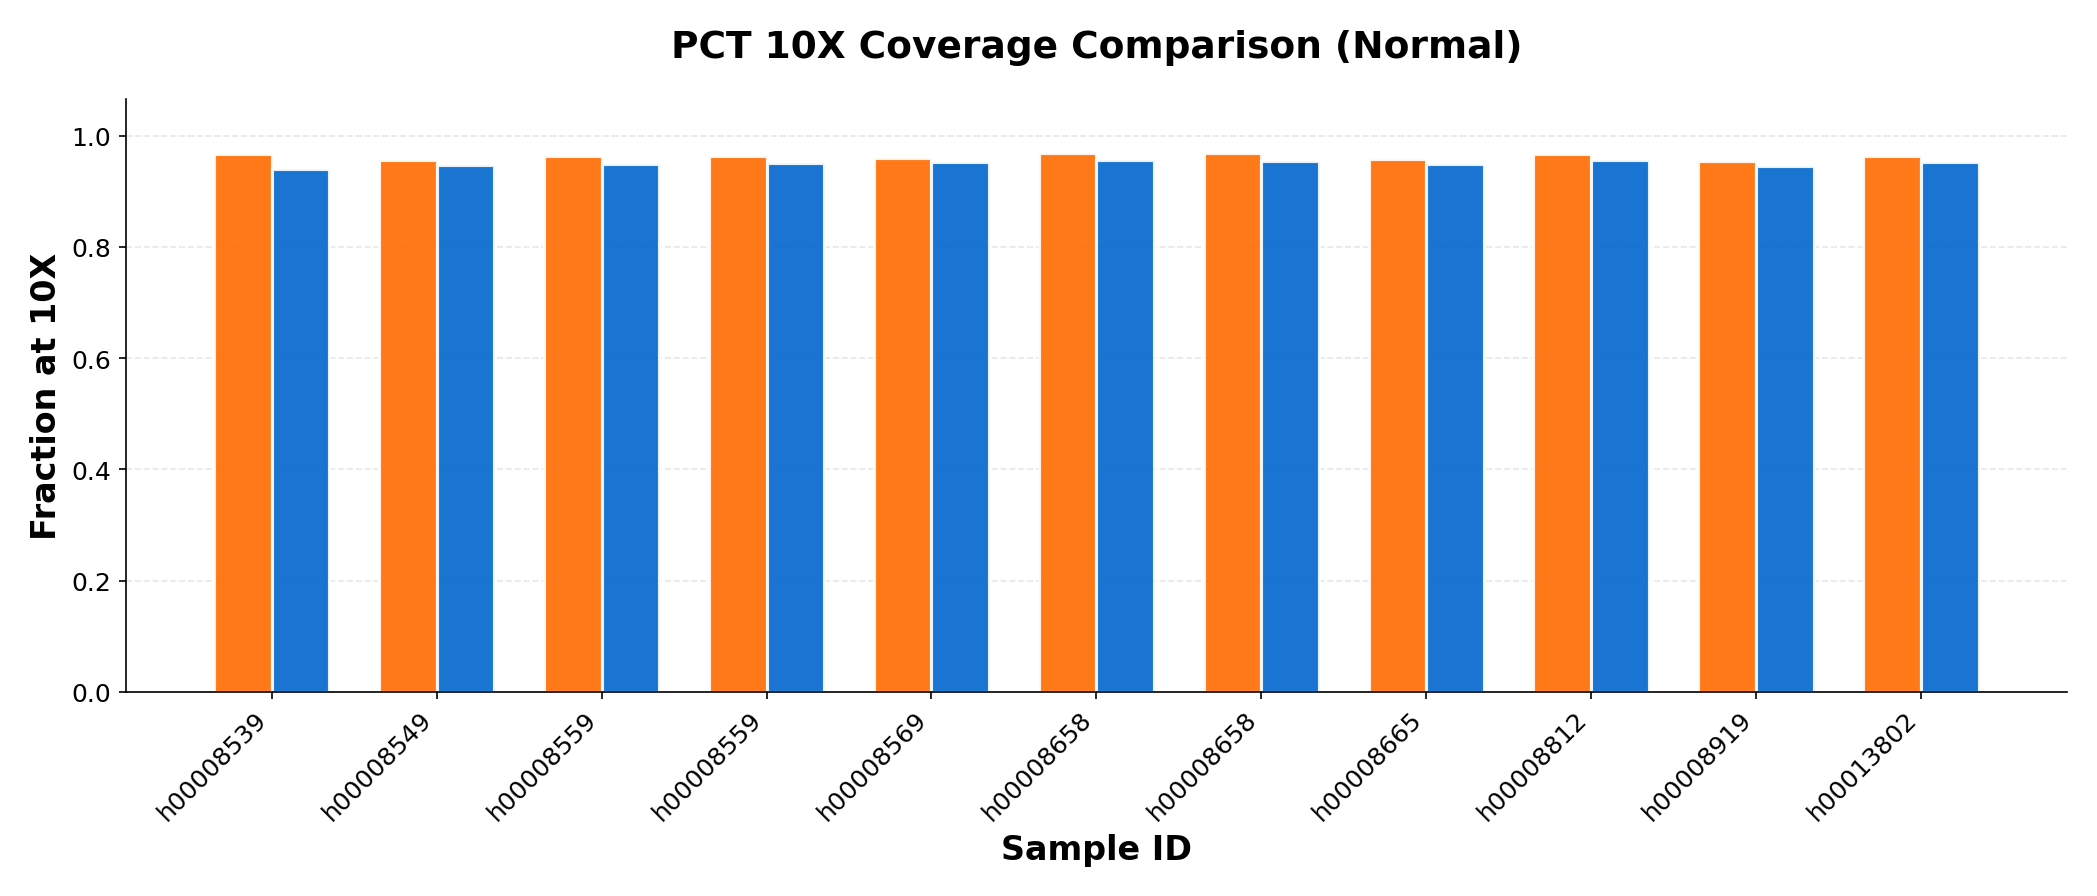

Saved: plots/normal_pct_10x.png


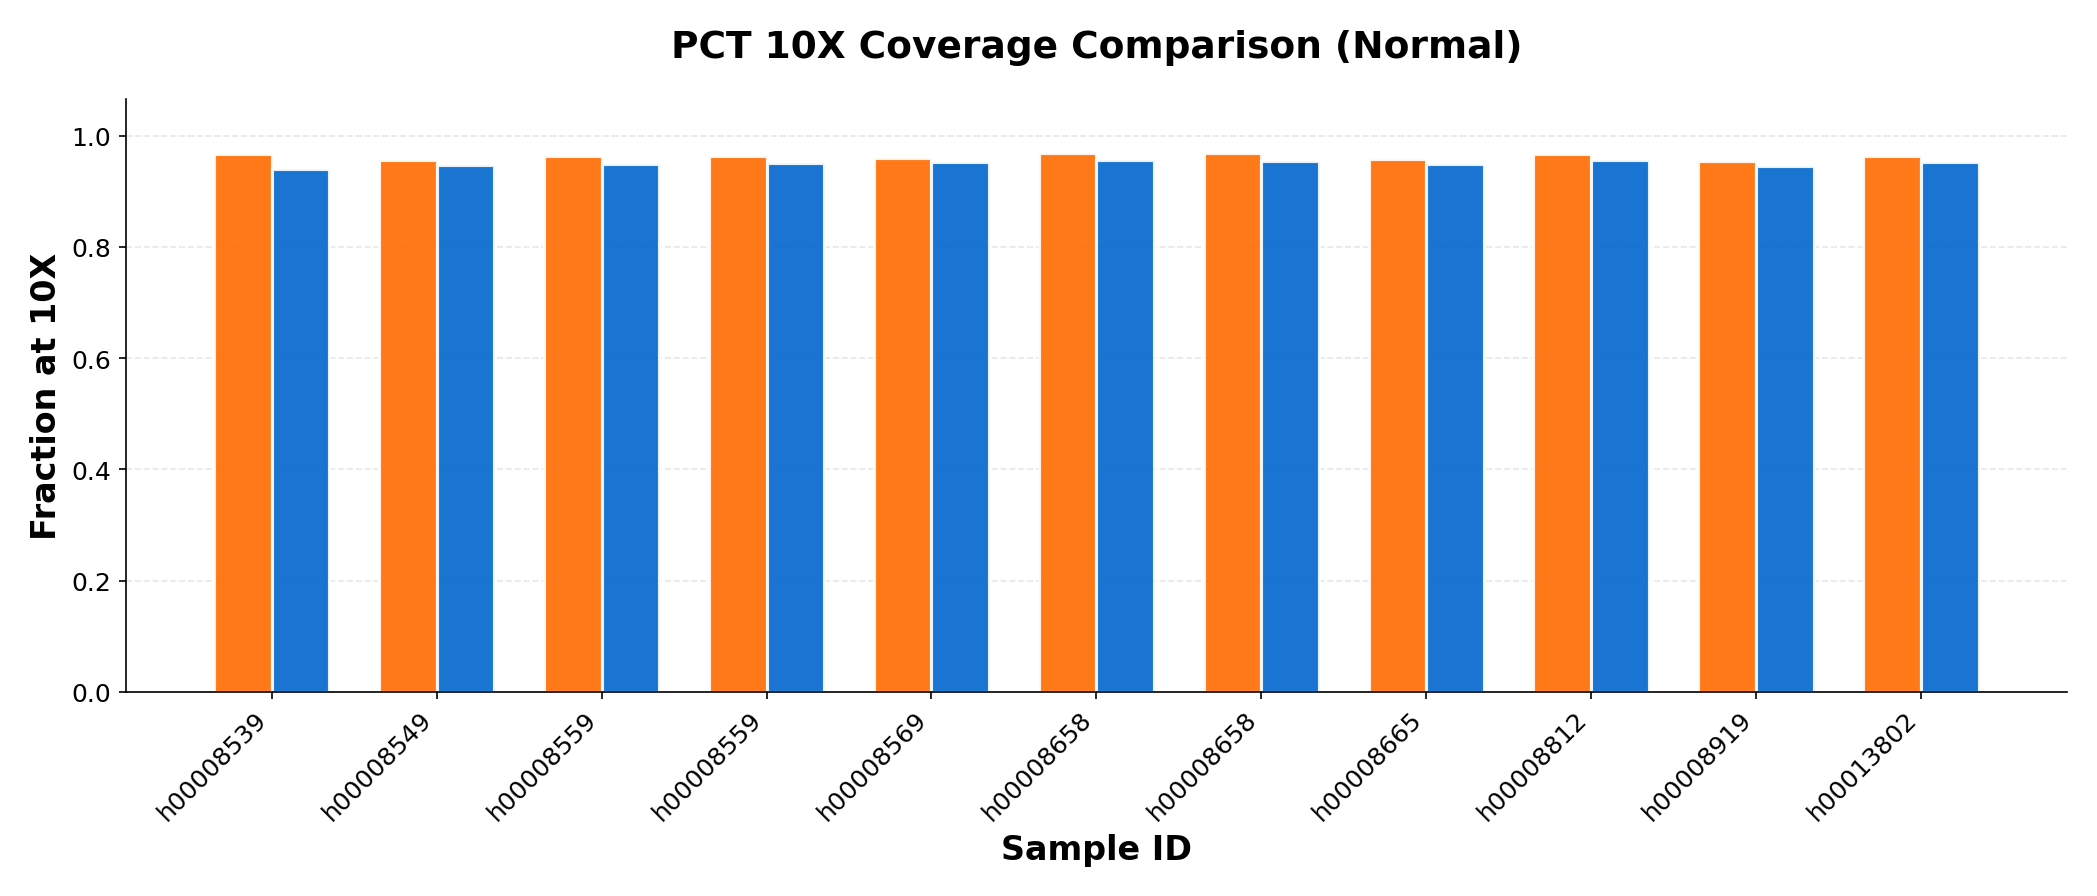

In [73]:
# PCT_10X - Normal
create_metric_plot(
    normal_comparison, 
    'PCT_10X', 
    'PCT 10X Coverage Comparison (Normal)', 
    'Fraction at 10X', 
    'normal_pct_10x.png'
)

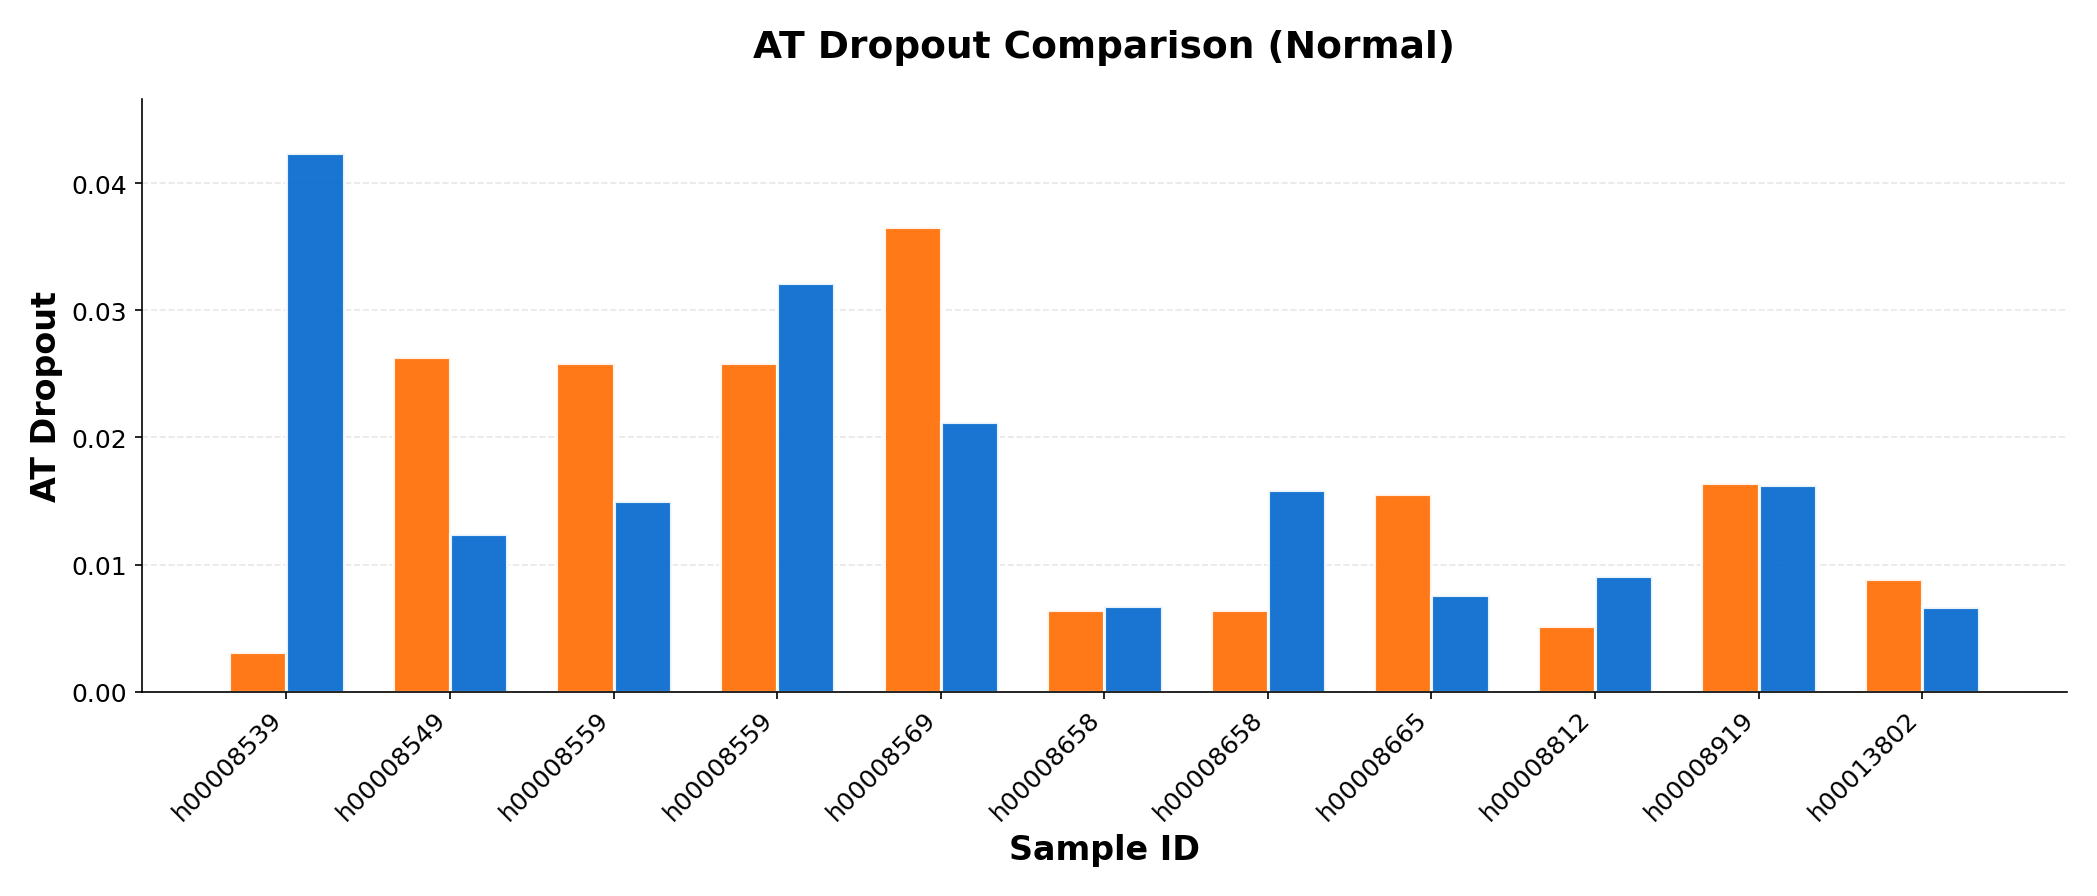

Saved: plots/normal_at_dropout.png


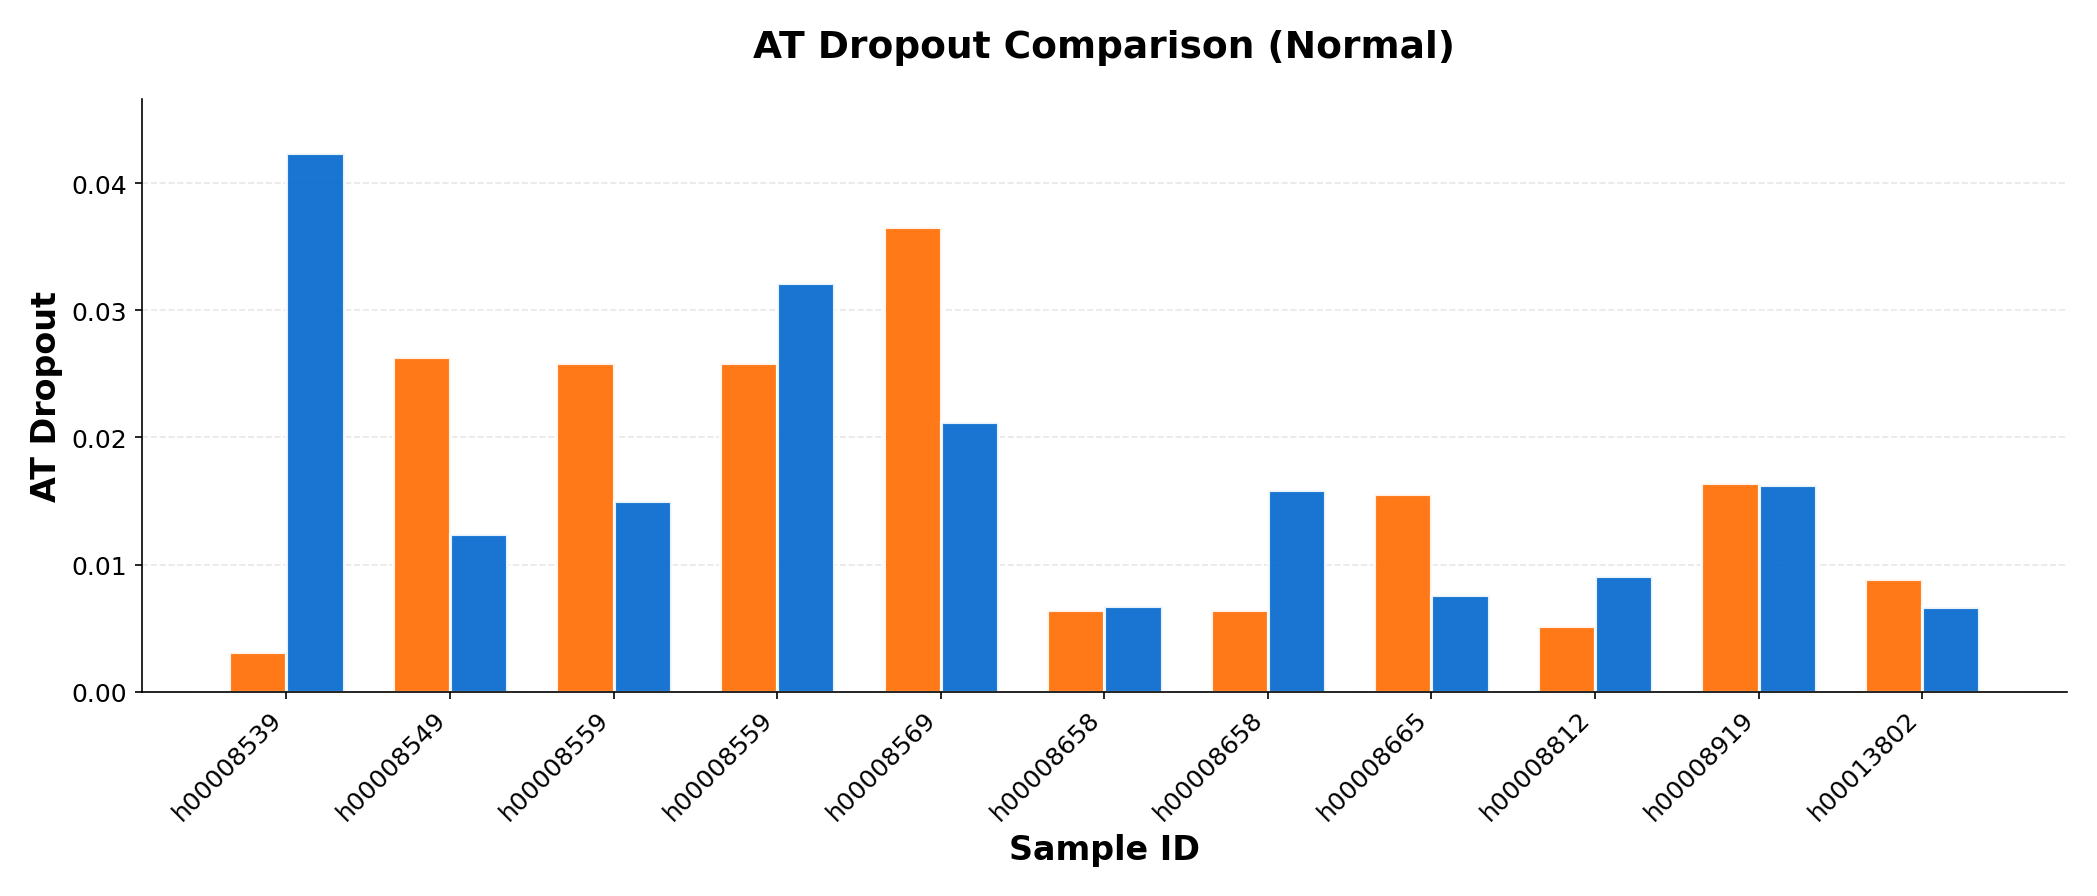

In [74]:
# AT Dropout - Normal
create_metric_plot(
    normal_comparison, 
    'AT_DROPOUT', 
    'AT Dropout Comparison (Normal)', 
    'AT Dropout', 
    'normal_at_dropout.png'
)

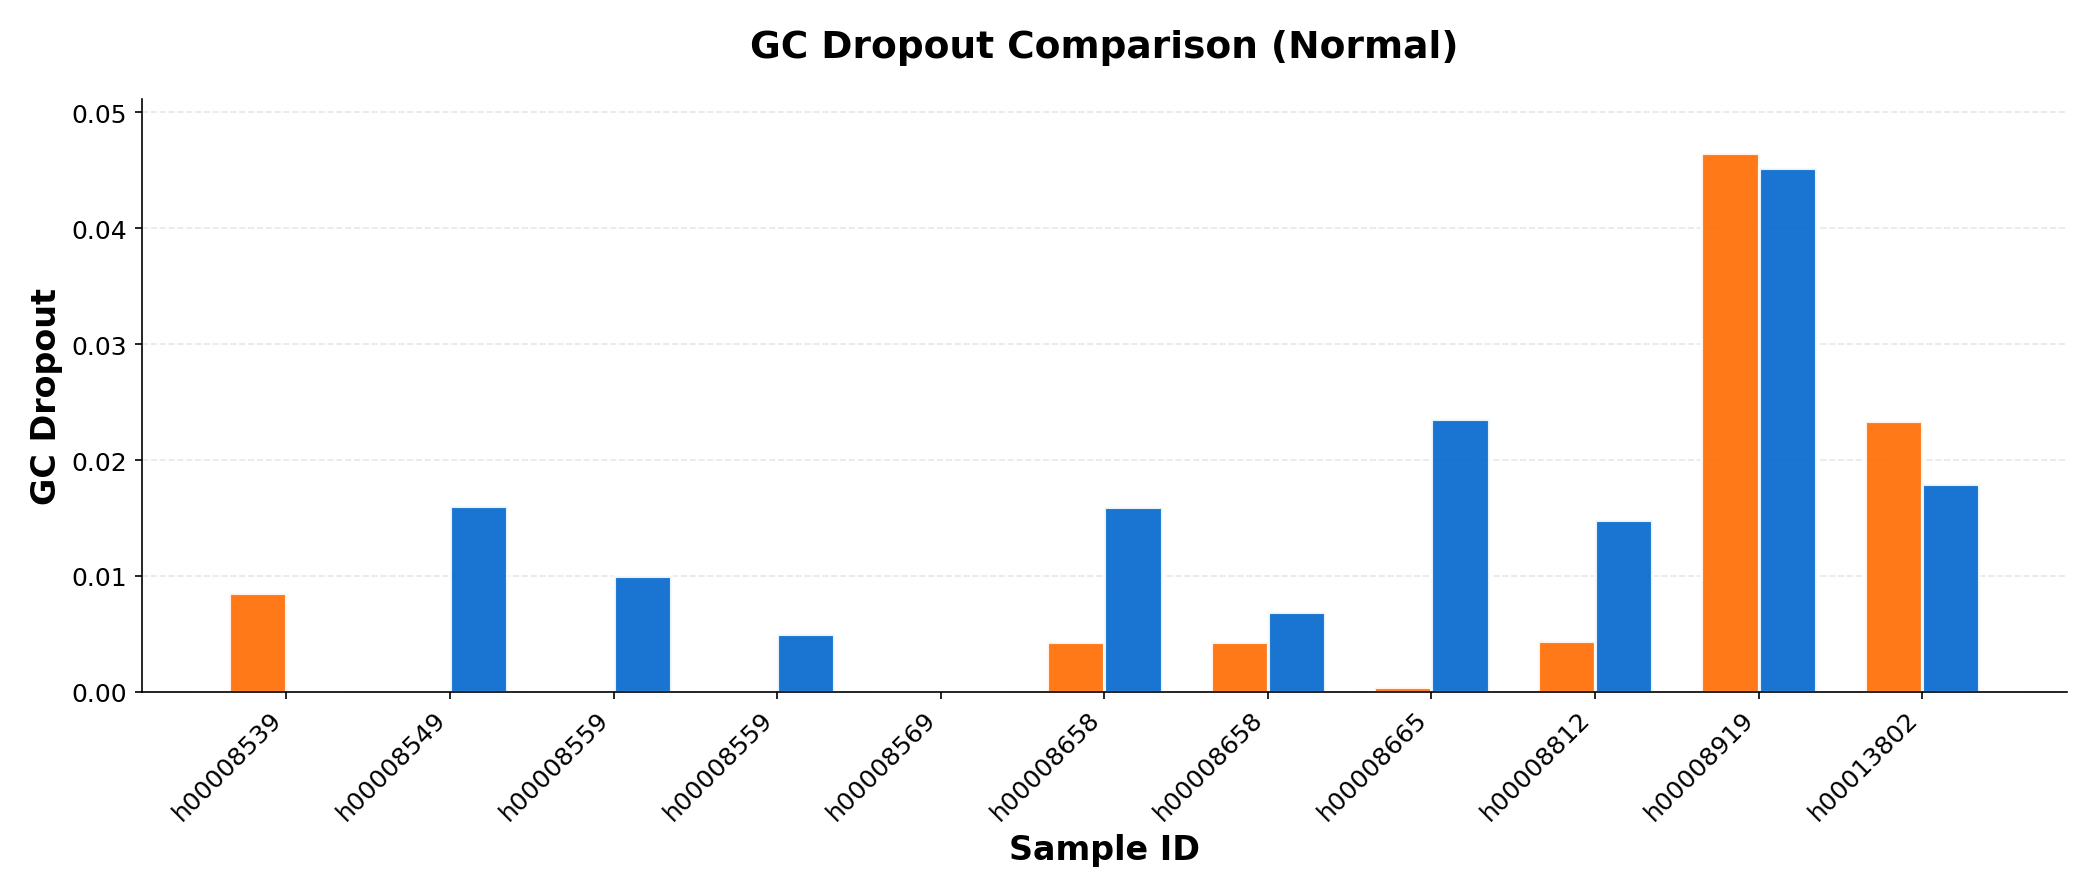

Saved: plots/normal_gc_dropout.png


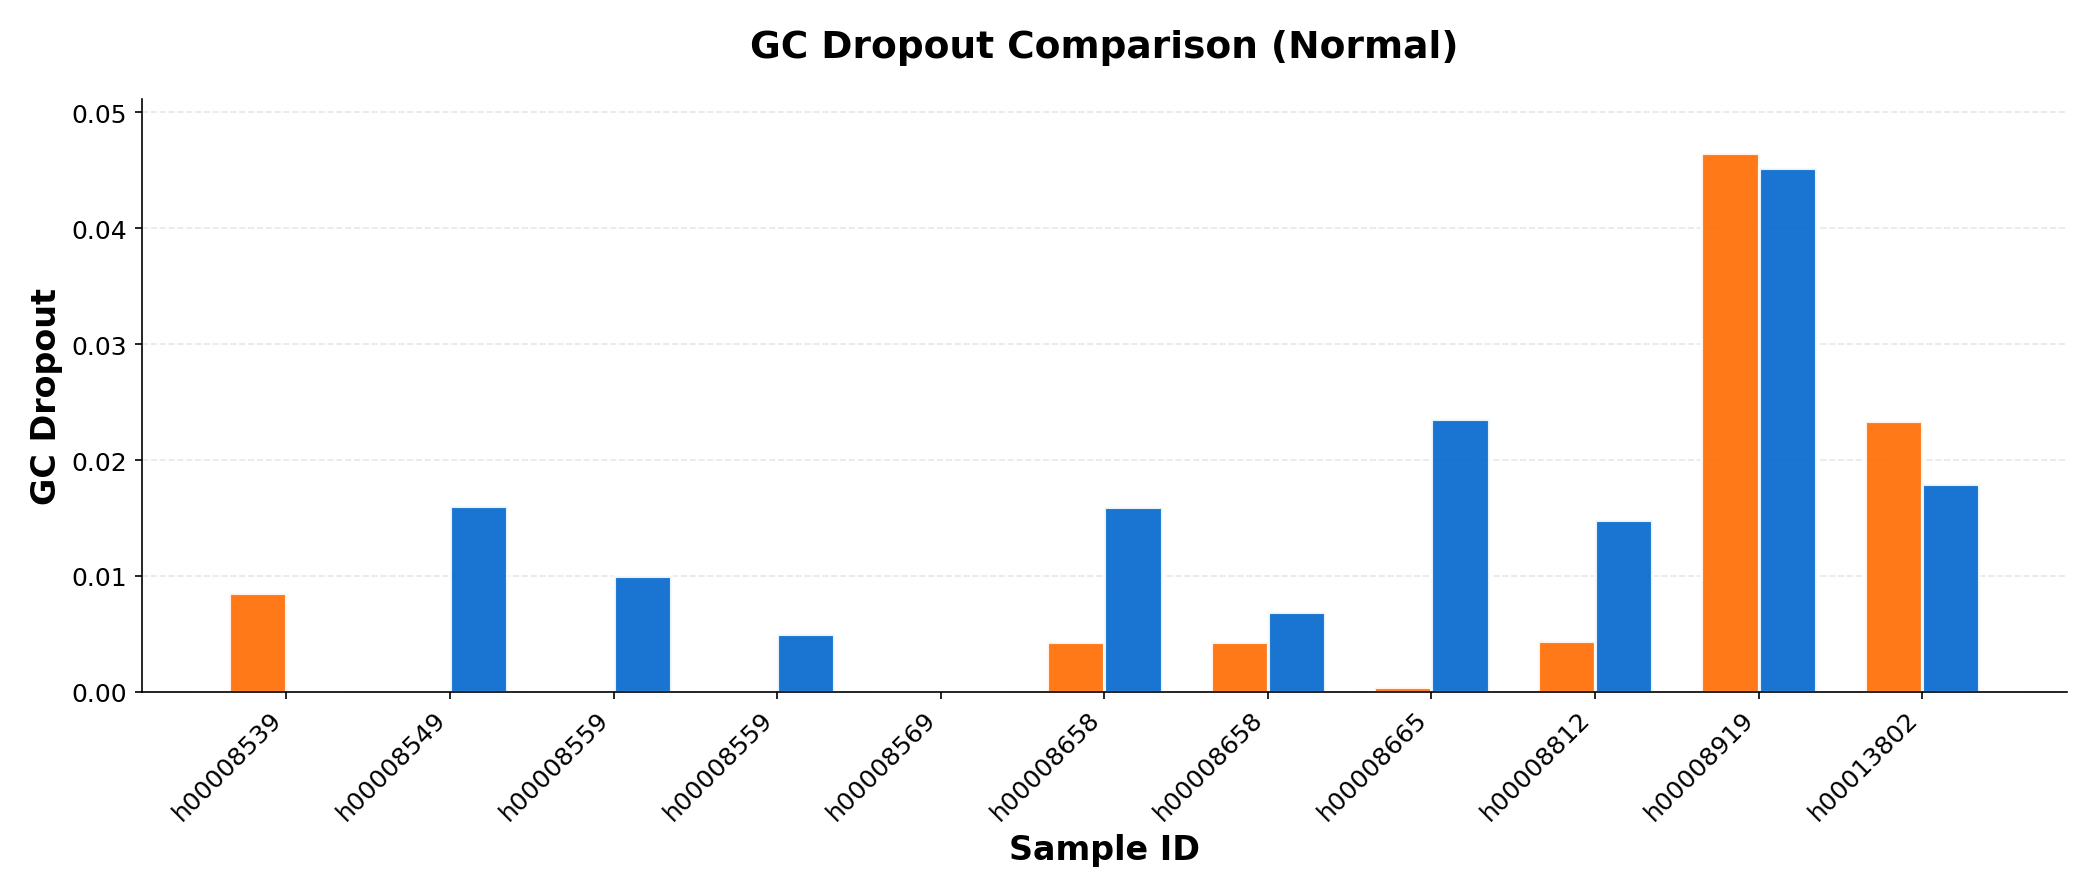

In [75]:
# GC Dropout - Normal
create_metric_plot(
    normal_comparison, 
    'GC_DROPOUT', 
    'GC Dropout Comparison (Normal)', 
    'GC Dropout', 
    'normal_gc_dropout.png'
)

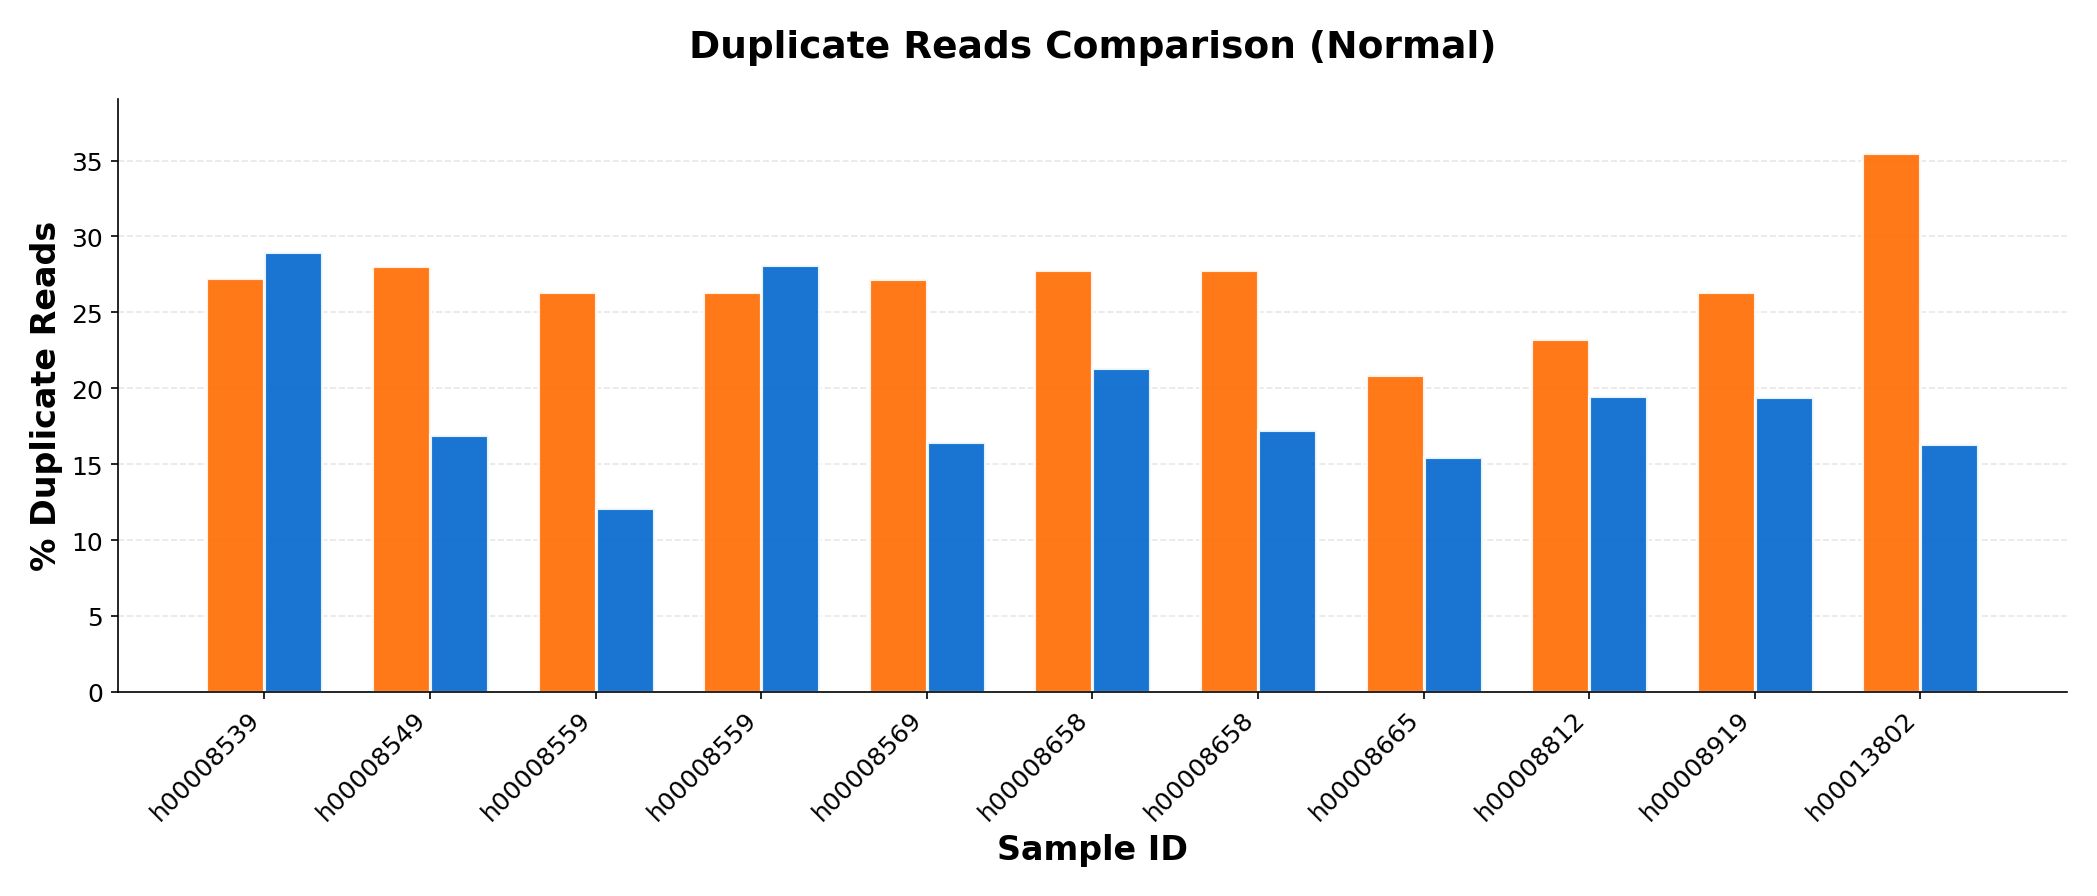

Saved: plots/normal_pct_duplicate.png


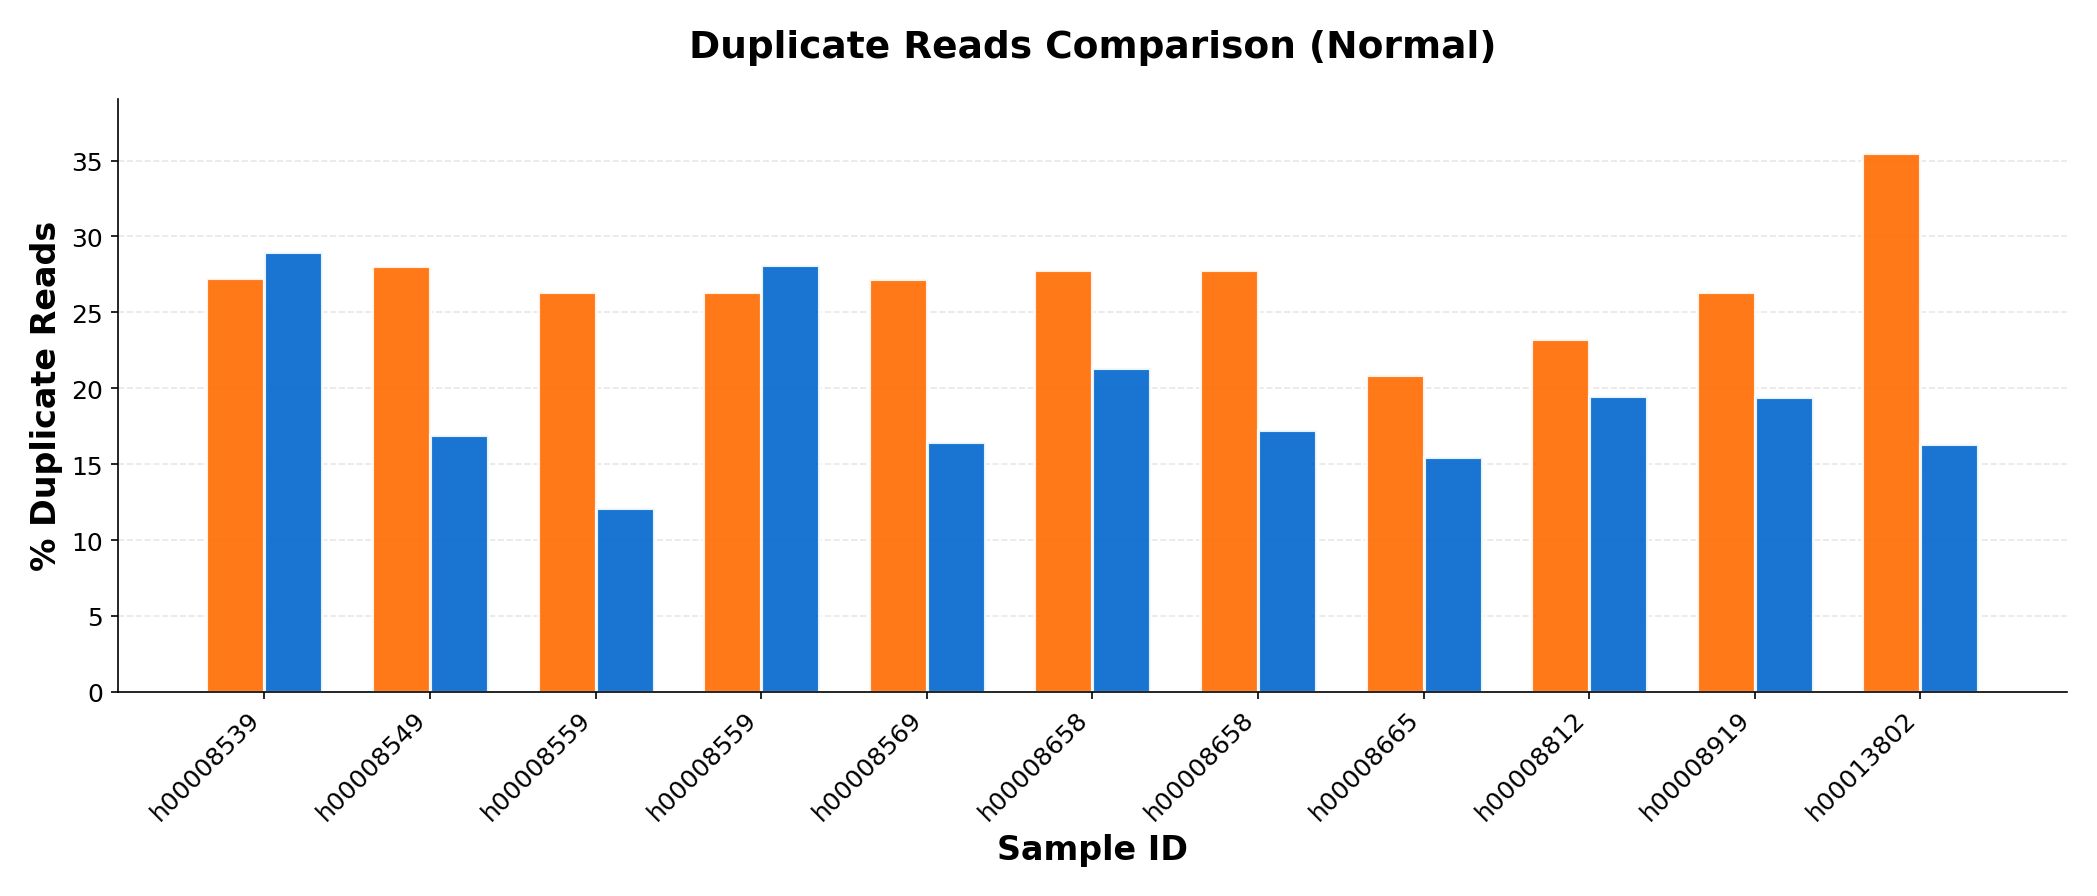

In [76]:
# % Duplicate Reads - Normal
create_metric_plot(
    normal_comparison, 
    'PCT_DUPLICATE', 
    'Duplicate Reads Comparison (Normal)', 
    '% Duplicate Reads', 
    'normal_pct_duplicate.png'
)

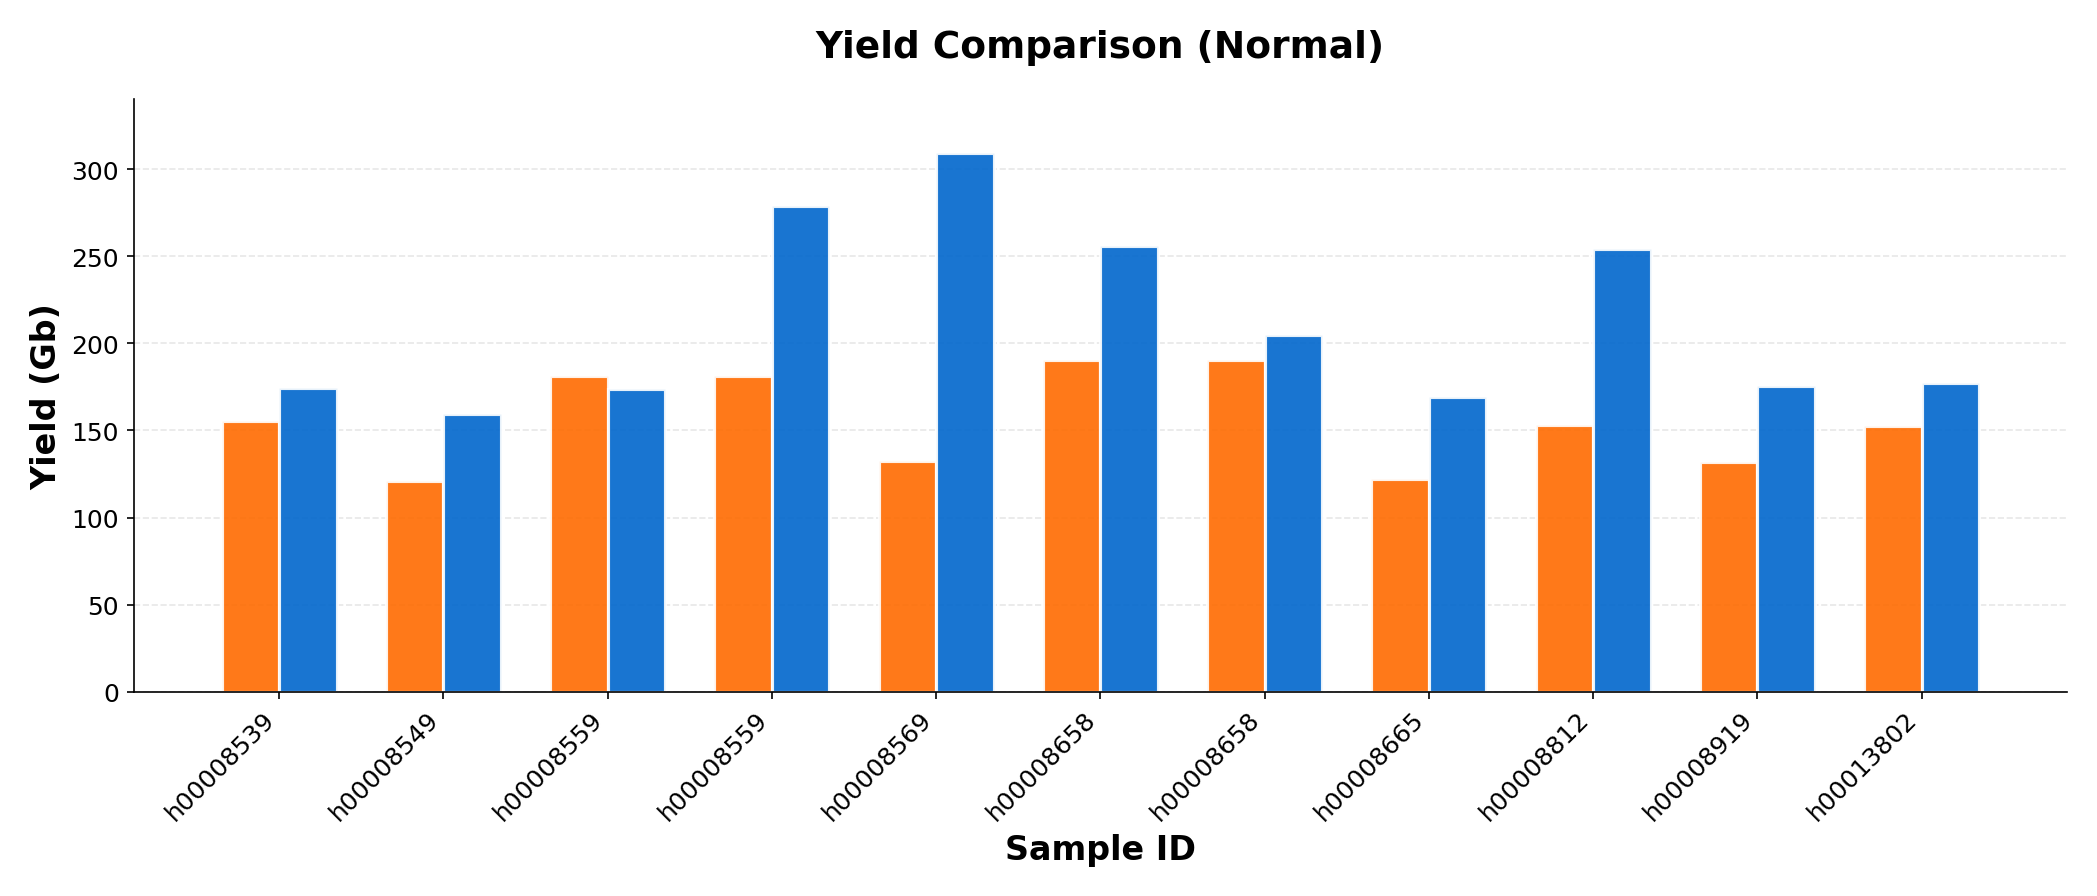

Saved: plots/normal_yield.png


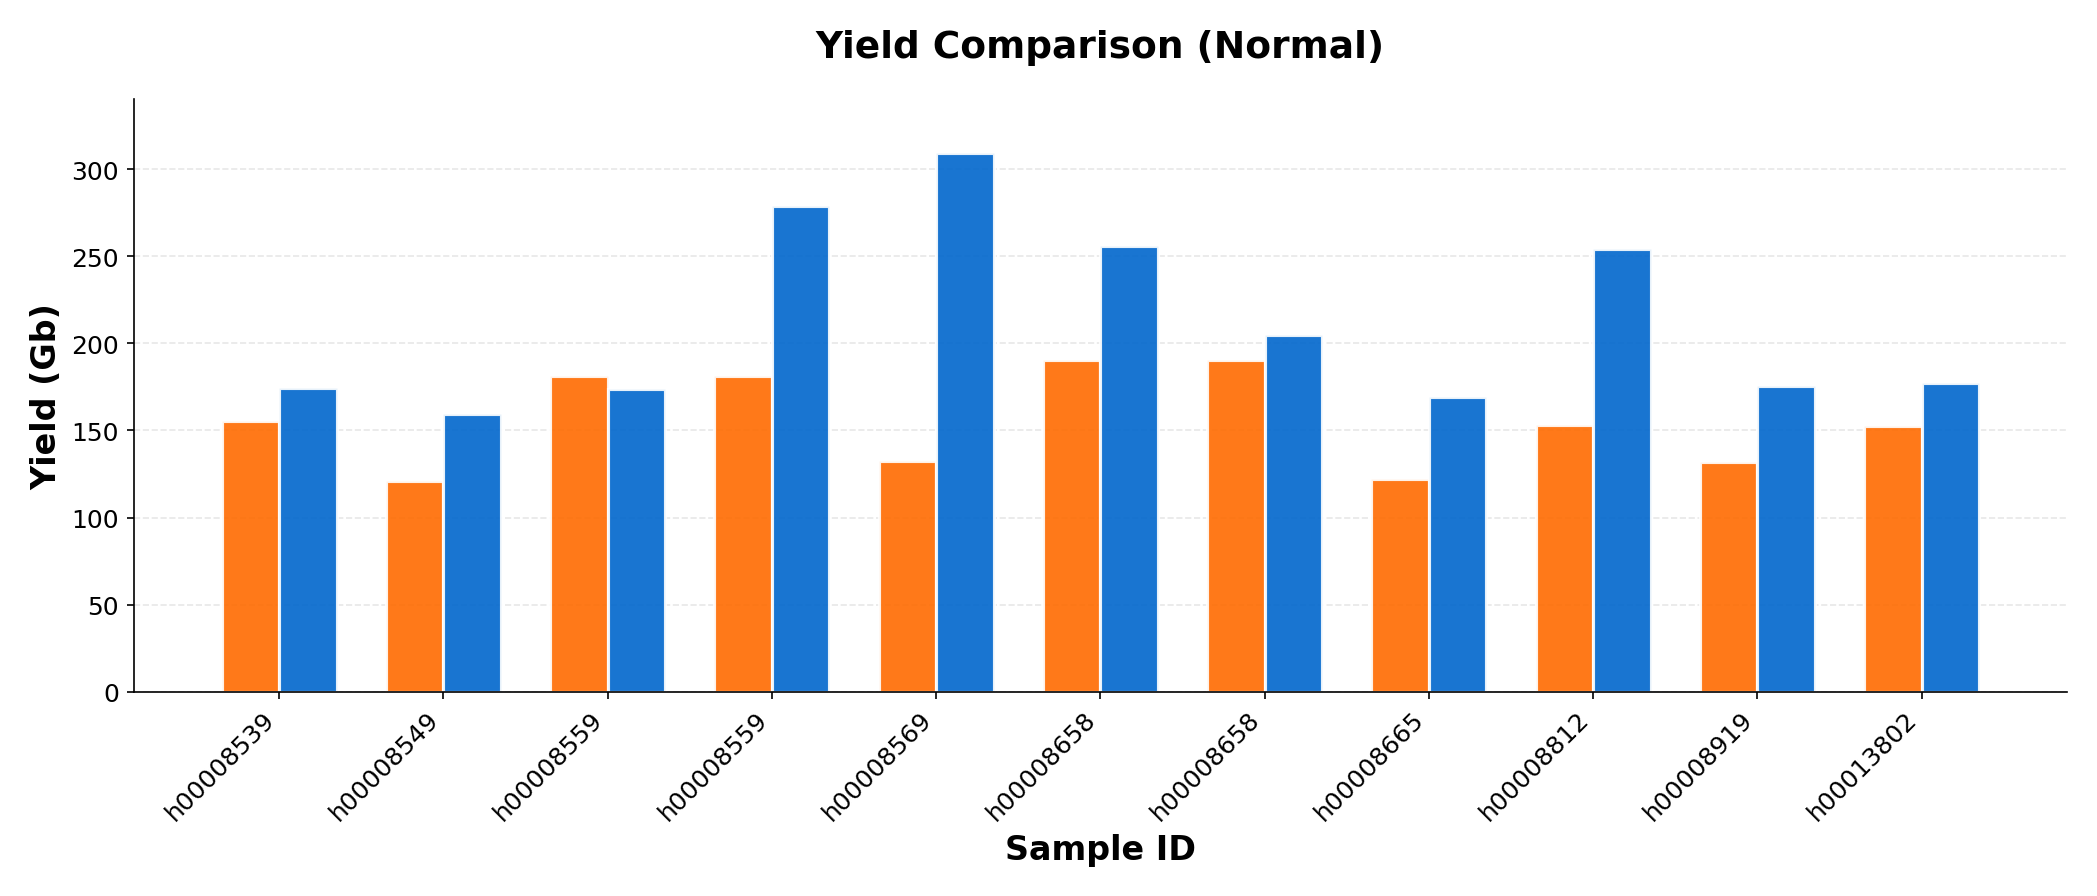

In [77]:
# Yield - Normal
create_metric_plot(
    normal_comparison, 
    'Yield', 
    'Yield Comparison (Normal)', 
    'Yield (Gb)', 
    'normal_yield.png'
)

## 11. Summary Statistics

In [78]:
# Tumor metrics list
tumor_metrics = ['MEDIAN_COVERAGE', 'MAD_COVERAGE', 'PCT_30X', 'AT_DROPOUT', 'GC_DROPOUT', 'PCT_DUPLICATE', 'Yield']

# Calculate summary statistics for tumor samples
print("=" * 60)
print("TUMOR SAMPLES SUMMARY")
print("=" * 60)

for metric in tumor_metrics:
    sbx_mean = tumor_comparison[f'{metric}_sbx'].mean()
    il_mean = tumor_comparison[f'{metric}_il'].mean()
    diff_pct = ((sbx_mean - il_mean) / il_mean * 100) if il_mean != 0 else 0
    print(f"{metric}:")
    print(f"  Illumina mean: {il_mean:.4f}")
    print(f"  SBX mean:      {sbx_mean:.4f}")
    print(f"  Difference:    {diff_pct:+.2f}%")
    print()

TUMOR SAMPLES SUMMARY
MEDIAN_COVERAGE:
  Illumina mean: 104.3636
  SBX mean:      100.7273
  Difference:    -3.48%

MAD_COVERAGE:
  Illumina mean: 19.0909
  SBX mean:      19.4545
  Difference:    +1.90%

PCT_30X:
  Illumina mean: 0.9632
  SBX mean:      0.9493
  Difference:    -1.44%

AT_DROPOUT:
  Illumina mean: 0.0187
  SBX mean:      0.0180
  Difference:    -3.74%

GC_DROPOUT:
  Illumina mean: 0.0009
  SBX mean:      0.0048
  Difference:    +440.86%

PCT_DUPLICATE:
  Illumina mean: 28.1981
  SBX mean:      28.0024
  Difference:    -0.69%

Yield:
  Illumina mean: 492.4339
  SBX mean:      653.6736
  Difference:    +32.74%



In [79]:
# Normal metrics list
normal_metrics = ['MEDIAN_COVERAGE', 'MAD_COVERAGE', 'PCT_10X', 'AT_DROPOUT', 'GC_DROPOUT', 'PCT_DUPLICATE', 'Yield']

# Calculate summary statistics for normal samples
print("=" * 60)
print("NORMAL SAMPLES SUMMARY")
print("=" * 60)

for metric in normal_metrics:
    sbx_mean = normal_comparison[f'{metric}_sbx'].mean()
    il_mean = normal_comparison[f'{metric}_il'].mean()
    diff_pct = ((sbx_mean - il_mean) / il_mean * 100) if il_mean != 0 else 0
    print(f"{metric}:")
    print(f"  Illumina mean: {il_mean:.4f}")
    print(f"  SBX mean:      {sbx_mean:.4f}")
    print(f"  Difference:    {diff_pct:+.2f}%")
    print()

NORMAL SAMPLES SUMMARY
MEDIAN_COVERAGE:
  Illumina mean: 34.4545
  SBX mean:      37.8182
  Difference:    +9.76%

MAD_COVERAGE:
  Illumina mean: 5.4545
  SBX mean:      6.3636
  Difference:    +16.67%

PCT_10X:
  Illumina mean: 0.9632
  SBX mean:      0.9502
  Difference:    -1.35%

AT_DROPOUT:
  Illumina mean: 0.0161
  SBX mean:      0.0169
  Difference:    +5.00%

GC_DROPOUT:
  Illumina mean: 0.0083
  SBX mean:      0.0141
  Difference:    +69.31%

PCT_DUPLICATE:
  Illumina mean: 26.9727
  SBX mean:      19.2597
  Difference:    -28.60%

Yield:
  Illumina mean: 155.5968
  SBX mean:      212.0292
  Difference:    +36.27%



In [ ]:
# Export comparison data to CSV for further analysis
tumor_comparison.to_csv('tumor_comparison_data.csv', index=False)
normal_comparison.to_csv('normal_comparison_data.csv', index=False)
print("Comparison data exported to CSV files.")

# List all generated plots
print("\n" + "=" * 60)
print("GENERATED PLOTS")
print("=" * 60)
import glob
for f in sorted(glob.glob('plots/*.png')):
    print(f"  {f}")